IAU Projekt 1.fáza - Prieskumná analýza 

Autori: Lukáš Lovás(50%), Daniel Lendvorský(50%)

Dátum: 29.10.2023

In [1590]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as scp
from scipy import stats
import statsmodels.api as sm

Načítanie údajov z datasetov

In [1591]:
filename = "084/product.csv"
product = pd.read_csv(filename, sep='\t')
product.head()

,code,store_name,product_ean,location
0,GB,Newbury,6528474892715,Europe/London
1,JP,Fujioka,5286283223229,Asia/Tokyo
2,AU,Carindale,5324066396422,Australia/Brisbane
3,JP,Yao,4730125966337,Asia/Tokyo
4,PK,Naushahra Virkan,9619713549372,Asia/Karachi


In [1592]:
filename2 = "084/session.csv"
session = pd.read_csv(filename2, sep='\t')
session.head()

,user_id,pct_rage_click,page_activity_duration,pct_wild_mouse,product_ean,pct_click_product_info,pct_input,pct_scrandom,total_load_time,pct_click,...,mouse_move_total_rel_distance,session_start,screen_height,pct_mouse_move,browser_name,pct_scroll_move,session_id,scroll_move_total_rel_distance,session_duration,wild_mouse_duration
0,1267,13.36096,11.11023,57.22747,5118402349247,61.27995,1.69380,34.23153,9.49291,11.96745,...,9.99263,2021-08-31 01:16:45,600,9.55140,edge,77.30550,1011277,8.30487,145.66025,8.27685
1,1831,39.43056,11.38646,48.81767,6613735863389,55.97373,1.93407,58.66919,1.26378,10.36340,...,10.30287,2021-05-28 17:34:01,768,8.07874,chrome,61.26521,539491,7.70199,109.48956,8.38637
2,374,62.84361,11.17206,53.92373,7388729766852,57.18573,1.59960,47.47953,3.28962,5.02218,...,7.49351,2018-12-28 16:43:17,1024,6.88911,chrome,48.98359,394667,8.17021,204.12507,8.36077
3,2260,64.68865,6.33869,37.68672,1190955887968,54.34917,0.44924,39.85515,2.25213,11.32430,...,8.26995,2022-02-03 06:22:50,800,7.53323,edge,66.82098,748123,7.97703,123.40293,4.17809
4,779,63.11689,4.82687,54.53248,9538008640320,27.01917,1.21089,15.93508,4.11748,10.18901,...,12.31943,2021-03-10 00:03:46,768,9.00901,mobile,75.85706,758679,9.01442,179.22699,8.08819


In [1593]:
filename3 = "084/user.csv"
user = pd.read_csv(filename3, sep='\t')
user.head()

,address,birthdate,sex,registration,name,username,mail,user_id,job,residence,race
0,Čajkovského 3\n203 70 Karolinka,2010-01-17,M,2015-03-12,Bohuslav Novotný,lucienemcova,vojtech17@chello.cz,172,NaN,Závrchy 7\n220 65 Luhačovice,unspecified
1,"PSC 7369, Box 4045\nAPO AA 65240",1909-01-15,NaN,2019-07-12,Richard Walker,williamspeter,megan55@yahoo.com,2091,NaN,NaN,unspecified
2,"Piazza Grisoni, 52 Piano 9\n09020, Villanovafr...",1970-07-04,M,2016-06-30,Dario Buscetta,jmajewski,gioeleturati@outlook.com,146,NaN,NaN,NaN
3,"Rua Vitor Gabriel Gonçalves, 8\nVila Independe...",1915-10-01,NaN,2013/09/29,Bianca Cardoso,melissa88,nrodrigues@ig.com.br,659,Educador,NaN,asian
4,Pod Čertovou Skalou 4\n455 19 Nalžovské Hory,NaN,NaN,16 Aug 2017,Tomáš Blažek,frantisekprochazka,kadlecovasara@chello.cz,1196,NaN,NaN,NaN


Základný opis dát spolu s ich charakteristikami

DATASET:product 

EDA s vizualizáciou

Dataset product.csv obsahuje dokopy 14915 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 4. 

Zoznam jednotlivých atribútov:

	product_ean
	store_name
	code
	location



In [1594]:
product.shape

(14915, 4)

In [1595]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14895 non-null  object
 1   store_name   14915 non-null  object
 2   product_ean  14915 non-null  int64 
 3   location     14915 non-null  object
dtypes: int64(1), object(3)
memory usage: 466.2+ KB


In [1596]:
product.describe()

,product_ean
count,1.491500e+04
mean,5.005494e+12
std,2.883216e+12
min,8.830915e+08
25%,2.505067e+12
50%,5.006744e+12
75%,7.507479e+12
max,9.999557e+12


Analýza jednotlivých atribútov v datasete

Atribúty z datasetu product.csv, ktoré nás budú zaujímať sú najmä product_ean a location. Pri
skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi lokáciou a závislou hodnotou premennej “ack” (predikovaná premenna) indikujúcu nákup zákazníka počas jedného sedenia (session) v e-obchode. Atribút product_ean budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv, keďže tento atribút sa nachádza v oboch datasetoch.

In [1597]:
product.code.value_counts()

code
US    2504
IN    1078
RU     820
DE     760
BR     667
      ... 
MN      10
SA       9
TJ       9
ML       8
LR       6
Name: count, Length: 133, dtype: int64

In [1598]:
product.location.value_counts()

location
Asia/Kolkata        1078
America/New_York    1070
Europe/Berlin        760
America/Chicago      689
Europe/London        620
                    ... 
Asia/Yakutsk           9
Asia/Dushanbe          9
Asia/Riyadh            9
Africa/Bamako          8
Africa/Monrovia        6
Name: count, Length: 184, dtype: int64

In [1599]:
product.store_name.value_counts()

store_name
New City             30
Inverness            28
Kobuleti             27
Gilbert              27
Beidao               26
                     ..
Sheoganj              6
Curitiba              6
Granger               6
Gates-North Gates     5
Custoias              5
Name: count, Length: 958, dtype: int64

In [1600]:
product.product_ean.value_counts()

product_ean
6528474892715    1
4140694863515    1
699830198157     1
3038483943962    1
3903022305467    1
                ..
8662802065650    1
1350851393455    1
1863129911850    1
189871915665     1
9345956116292    1
Name: count, Length: 14915, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

Overenie duplicitných záznamov

Ako môžeme vidieť v datasete product sme nenašli žiadne duplicikáty a momentálne sme neidentifikovali žiadne iné problémy v daných dátach s prvotným riešením.

In [1601]:
duplicate = product[product.duplicated()]
product = product.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(product)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 14915
V datasete sa nachádza: 0 duplikátov.


DATASET: session

Dataset session.csv obsahuje dokopy 11046 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 25. 

In [1602]:
session.shape

(11046, 25)

In [1603]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         11046 non-null  int64  
 1   pct_rage_click                  11035 non-null  float64
 2   page_activity_duration          11035 non-null  float64
 3   pct_wild_mouse                  11035 non-null  float64
 4   product_ean                     11046 non-null  int64  
 5   pct_click_product_info          11035 non-null  float64
 6   pct_input                       11035 non-null  float64
 7   pct_scrandom                    11035 non-null  float64
 8   total_load_time                 11046 non-null  float64
 9   pct_click                       11035 non-null  float64
 10  screen_width                    11046 non-null  object 
 11  pct_scroll_move_duration        11035 non-null  float64
 12  ack                             

In [1604]:
session.describe()

,user_id,pct_rage_click,page_activity_duration,pct_wild_mouse,product_ean,pct_click_product_info,pct_input,pct_scrandom,total_load_time,pct_click,...,ack,pct_mouse_click,pct_doubleclick,mouse_move_total_rel_distance,pct_mouse_move,pct_scroll_move,session_id,scroll_move_total_rel_distance,session_duration,wild_mouse_duration
count,11046.000000,11035.000000,11035.000000,11035.000000,1.104600e+04,11035.000000,11035.000000,11035.000000,11046.000000,11035.000000,...,11046.000000,11035.000000,11035.000000,11035.000000,11035.000000,11035.000000,1.104600e+04,11034.000000,11046.000000,11035.000000
mean,1255.780645,49.335913,8.690997,48.587438,5.028290e+12,49.111376,1.178877,50.285934,4.005360,9.289874,...,0.548162,9.682500,9.456206,9.292634,8.508854,52.182707,7.518338e+05,8.519333,150.604875,6.792734
std,718.615742,13.942751,2.233684,13.214715,2.890200e+12,13.296536,2.160966,12.439419,2.805904,2.028780,...,0.497698,2.473803,2.002375,2.118023,0.998451,13.502190,4.315524e+05,1.007736,60.977556,1.410734
min,0.000000,0.000000,0.737390,0.000000,2.412431e+09,0.000000,0.000000,0.000000,0.013140,1.090310,...,0.000000,0.000000,1.699640,0.342750,4.891520,0.000000,1.030000e+03,4.470330,-92.919090,0.602960
25%,636.000000,39.724560,6.988780,39.763010,2.556155e+12,40.187780,0.609060,41.917425,1.938618,8.281450,...,0.000000,8.010070,8.297860,8.042850,7.839245,43.071045,3.783465e+05,7.839832,109.499407,5.932995
50%,1250.500000,49.316090,8.828940,48.687750,5.008988e+12,49.064000,0.773720,50.249340,3.374895,9.758960,...,1.000000,9.677540,9.730900,9.702120,8.500650,52.143120,7.537820e+05,8.518630,150.397070,6.805400
75%,1884.000000,58.940205,10.420815,57.461865,7.556391e+12,58.072415,1.073915,58.698980,5.401983,10.666375,...,1.000000,11.320900,10.820610,10.715855,9.191965,61.328060,1.122913e+06,9.202202,191.316595,7.638670
max,2499.000000,100.000000,15.557980,100.000000,9.998981e+12,100.000000,100.000000,100.000000,23.115910,14.642410,...,1.000000,21.039530,16.734470,16.348300,11.981490,100.000000,1.499885e+06,12.324070,391.029670,12.862990


Analýza významných atribútov v datasete

Atribúty z datasetu labor.csv, sú najmä číselné atribúty a preto viacero z nich je zaujímavých. Je možné
pozorovať rôzne závislosti a vzťahy medzi nimi. Nás budú zaujímať hlavne tieto atribúty:

ack                               
page_activity_duration                          
browser_name                       
product_ean                                  
user_id                         
session_start                        
session_duration                                  

Atribúty product_ean a user_id budeme potrebovať pre spojenie s druhými datasetmi product.csv a user.csv, keďže tieto atribúty sú v daných súboroch spoločné.


     

Atribút: ack

In [1605]:
session.ack.value_counts()

ack
1.0    6055
0.0    4991
Name: count, dtype: int64

<Axes: xlabel='ack'>

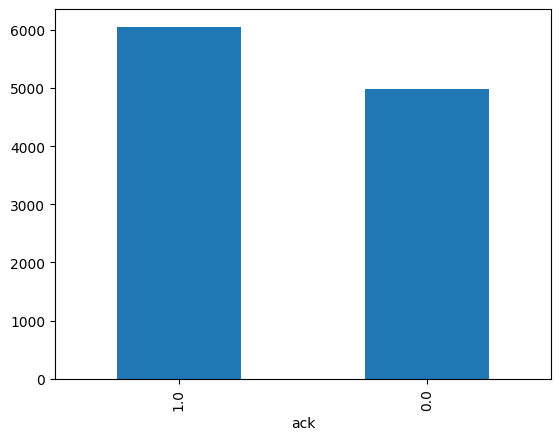

In [1606]:
session.ack.value_counts().plot(kind='bar')

Atribút: page_activity_duration

In [1607]:
session.page_activity_duration.describe()

count    11035.000000
mean         8.690997
std          2.233684
min          0.737390
25%          6.988780
50%          8.828940
75%         10.420815
max         15.557980
Name: page_activity_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

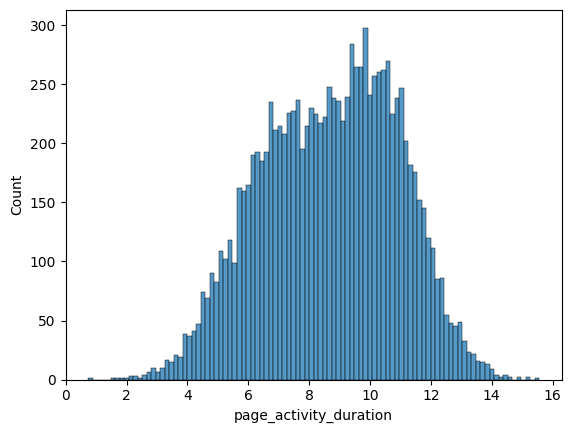

In [1608]:
sns.histplot(session.page_activity_duration,bins=100)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='page_activity_duration'>

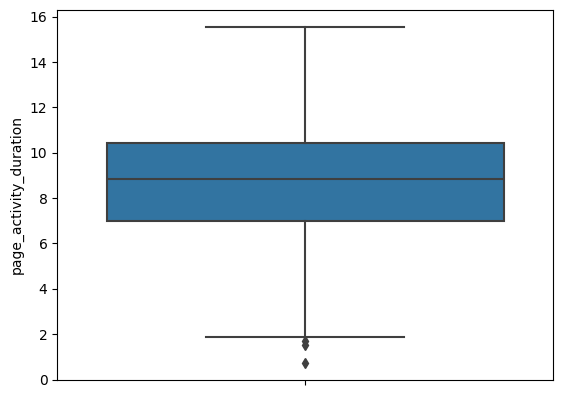

In [1609]:
sns.boxplot(y = session.page_activity_duration)

Atribút: browser_name

In [1610]:
session.browser_name.describe()

count      11046
unique         7
top       chrome
freq        3336
Name: browser_name, dtype: object

In [1611]:
session['browser_name'].value_counts()


browser_name
chrome     3336
edge       3270
safari     1152
firefox    1086
mobile     1045
other       603
opera       554
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='browser_name', ylabel='count'>

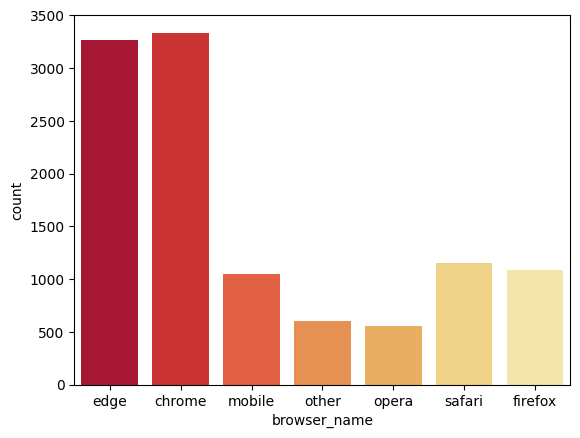

In [1612]:
sns.countplot(data=session,x="browser_name",palette=("YlOrRd_r"))

Atribút: user_id

In [1613]:
session.user_id.describe()

count    11046.000000
mean      1255.780645
std        718.615742
min          0.000000
25%        636.000000
50%       1250.500000
75%       1884.000000
max       2499.000000
Name: user_id, dtype: float64

Atribút: session_start

In [1614]:
session.session_start.describe()


count                   11046
unique                  10915
top       2022-09-25 00:25:43
freq                        2
Name: session_start, dtype: object

Atribút: session_duration

In [1615]:
session.session_duration.describe()


count    11046.000000
mean       150.604875
std         60.977556
min        -92.919090
25%        109.499407
50%        150.397070
75%        191.316595
max        391.029670
Name: session_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='session_duration', ylabel='Count'>

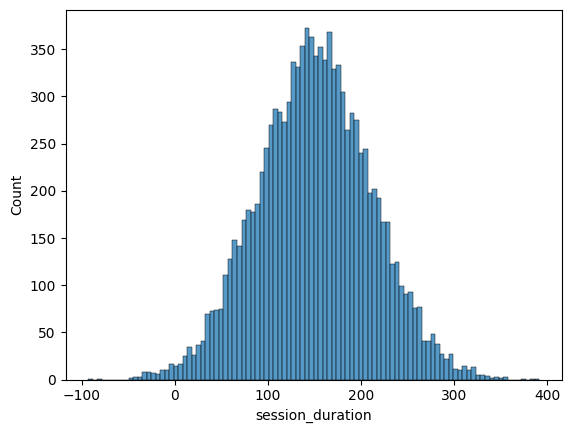

In [1616]:
sns.histplot(session.session_duration,bins=100)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='session_duration'>

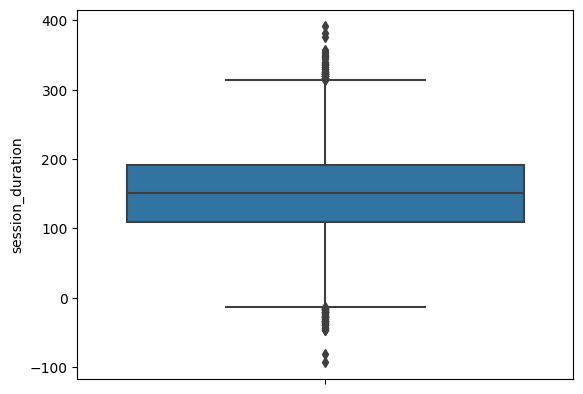

In [1617]:
sns.boxplot(y = session.session_duration)

Identifikácia problémov v dátach s prvotným riešením

Analýza dát datasetu a nájdenie riešení pre optimalizáciu

In [1618]:
print([key for key, value in session.dtypes.items() if value == 'object'])

['screen_width', 'session_start', 'screen_height', 'browser_name']


In [1619]:
session.screen_height.unique()
session.screen_width.unique()

array(['800', '1280', '1366', '1024', '1920', 'lower', 'higher'],
      dtype=object)

podľa analýzy typov atribútov datasetu je možné vidieť nasledovné zlepšenia :
- screen_width, screen_height sú typu object (String), ideálne by bolo držať si ich vo formáte int

In [1620]:
valid_heights = session[~session.screen_height.isin(["lower", "higher"])]
valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)

valid_width = session[~session.screen_width.isin(["lower", "higher"])]
valid_width['screen_width'] = valid_width['screen_width'].astype(float)

min_height = valid_heights['screen_height'].min()
max_height = valid_heights['screen_height'].max()

min_width = valid_width['screen_width'].min()
max_width = valid_width['screen_width'].max()

def replace_values_height(value):
    if value == 'lower':
        return min_height
    elif value == 'higher':
        return max_height
    else:
        return value

def replace_values_width(value):
    if value == 'lower':
        return min_width
    elif value == 'higher':
        return max_width
    else:
        return value

session['screen_height'] = session['screen_height'].apply(replace_values_height)
session['screen_height'] = session['screen_height'].fillna(0).astype(int)

session['screen_width'] = session['screen_width'].apply(replace_values_width)
session['screen_width'] = session['screen_width'].fillna(0).astype(int)

C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_5072\2752222672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)
C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_5072\2752222672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_width['screen_width'] = valid_width['screen_width'].astype(float)


In [1621]:
session.screen_height.unique()
session.screen_width.unique()

array([ 800, 1280, 1366, 1024, 1920])

Zmena reprezentácie "browser_name" zo Stringov na identifier (integer)

In [1622]:
browser_names = session.browser_name.unique()
browser_names

array(['edge', 'chrome', 'mobile', 'other', 'opera', 'safari', 'firefox'],
      dtype=object)

In [1623]:
browser_name_mapping = {
    'edge': 1,
    'chrome': 2,
    'mobile': 3,
    'firefox': 4,
    'opera': 5,
    'safari': 6,
    'other': 7
}

print("Pred zmenou: " + str(session['browser_name'].unique()))
session['browser_name'] = session['browser_name'].map(browser_name_mapping)

print("Po zmene: " + str(session['browser_name'].unique()))

Pred zmenou: ['edge' 'chrome' 'mobile' 'other' 'opera' 'safari' 'firefox']
Po zmene: [1 2 3 7 5 6 4]


Overenie duplicitných záznamov

In [1624]:
duplicate = session[session.duplicated()]
session = session.drop_duplicates()
print("Počet záznamov v datasete: "+ str(len(session)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 10915
V datasete sa nachádza: 131 duplikátov.


Ďalšie možné úpravy: 

ujednotenie formátu session_start, lepšia interpretácia dátumu s časom (rozdelenie do dvoch collumns: date/time)

DATASET:user

Dataset user.csv obsahuje dokopy 2585 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 11. 


In [1625]:
user.shape

(2585, 11)

In [1626]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       2197 non-null   object
 1   birthdate     1422 non-null   object
 2   sex           1293 non-null   object
 3   registration  2585 non-null   object
 4   name          2585 non-null   object
 5   username      2585 non-null   object
 6   mail          2585 non-null   object
 7   user_id       2585 non-null   int64 
 8   job           1034 non-null   object
 9   residence     905 non-null    object
 10  race          776 non-null    object
dtypes: int64(1), object(10)
memory usage: 222.3+ KB


In [1627]:
user.describe()

,user_id
count,2585.000000
mean,1279.099420
std,733.313018
min,0.000000
25%,652.000000
50%,1283.000000
75%,1903.000000
max,2584.000000


Analýza významných atribútov v datasete

Atribúty z datasetu user.csv, ktoré nás budú zaujímať sú najmä birthdate, registration, user_id, sex a race.

Pri skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi danými atribútmi a predikovanou premennou ack. 

Atribút user_id ako už bolo spomenuté budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv.

In [1628]:
user.sex.value_counts()

sex
M    652
F    641
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='count'>

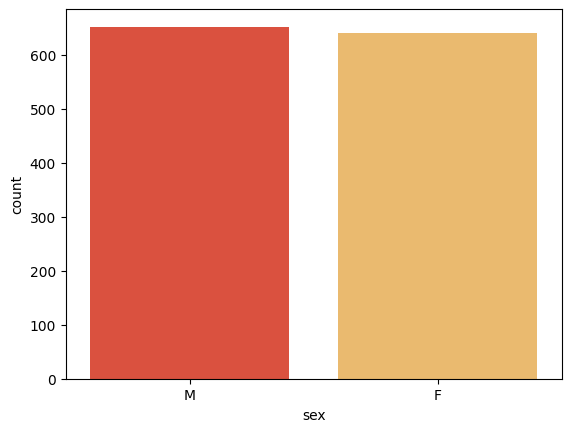

In [1629]:
sns.countplot(data=user,x="sex",palette=("YlOrRd_r"))

In [1630]:
user.race.value_counts()

race
unspecified    238
white          167
black          164
asian          144
indian          63
Name: count, dtype: int64

<Axes: ylabel='count'>

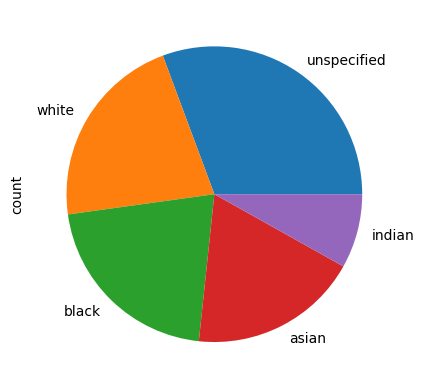

In [1631]:
user.race.value_counts().plot(kind='pie')

In [1632]:
user.birthdate.value_counts()

birthdate
1960-03-04    3
1928-10-27    2
1969-05-13    2
1977-12-04    2
1948-03-02    2
             ..
1912-03-27    1
2006-02-15    1
1936-06-06    1
1944-09-24    1
1929-12-10    1
Name: count, Length: 1395, dtype: int64

In [1633]:
user.registration.value_counts()

registration
06 Nov 2014    4
2021-03-29     4
2020-09-15     3
20 Nov 2019    3
2014/12/29     3
              ..
2013-10-31     1
09 Apr 2022    1
2022/04/03     1
2023/02/10     1
2018-08-14     1
Name: count, Length: 2356, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

podľa analýzy typov atribútov datasetu je možné vidieť nasledovné zlepšenia :
- 


Nahradiť hodnoty NaN v sex collumn na unspecified (užívateľ nešpecifikovaľ pohlavie)


In [1634]:
print("Pred zmenou: " + str(user["sex"].unique()))
user["sex"].fillna(value="unspecified",inplace=True)
print("Po zmene: " + str(user["sex"].unique()))


Pred zmenou: ['M' nan 'F']
Po zmene: ['M' 'unspecified' 'F']


Sex je typu object (String), ideálne by bolo držať si ich vo formáte int

In [1635]:
sex_mapping = {
    "M": 1,
    "F": 2,
    "unspecified": 0
}
print("Pred zmenou: " + str(user['sex'].unique()))
user['sex'] = user['sex'].map(sex_mapping)

print("Po zmene: " + str(user['sex'].unique()))

Pred zmenou: ['M' 'unspecified' 'F']
Po zmene: [1 0 2]


sex_mapping = {
    "M": 1,
    "F": 2,
    "unspecified": 0
}

print("Pred zmenou: " + str(user["sex"].unique()))
for i,value in enumerate(user["sex"]):
    user.loc[i,"sex"] = sex_mapping.get(value)

print("Po zmene: " + str(user["sex"].unique()))

Hodnoty NaN v race collumn zmeniť na "unspecified" -> v budúcnosti bude lepšie zvoliť lepšiu stratégiu náhrady

In [1636]:
user.race.value_counts()

race
unspecified    238
white          167
black          164
asian          144
indian          63
Name: count, dtype: int64

In [1637]:
print("Pred zmenou: " + str(user["race"].unique()))
user["race"].fillna(value="unspecified",inplace=True)
#user.dropna(subset=["race"], inplace=True)
print("Po zmene: " + str(user["race"].unique()))

Pred zmenou: ['unspecified' nan 'asian' 'white' 'black' 'indian']
Po zmene: ['unspecified' 'asian' 'white' 'black' 'indian']


In [1638]:
user.race.value_counts()

race
unspecified    2047
white           167
black           164
asian           144
indian           63
Name: count, dtype: int64

Overenie duplicitných záznamov

In [1639]:
duplicate = user[user.duplicated()]
user = user.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(user)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 2585
V datasete sa nachádza: 0 duplikátov.


Overenie prázdnych hodnôt

In [1640]:
session.isnull().sum()

user_id                            0
pct_rage_click                    11
page_activity_duration            11
pct_wild_mouse                    11
product_ean                        0
pct_click_product_info            11
pct_input                         11
pct_scrandom                      11
total_load_time                    0
pct_click                         11
screen_width                       0
pct_scroll_move_duration          11
ack                                0
pct_mouse_click                   11
pct_doubleclick                   11
mouse_move_total_rel_distance     11
session_start                      0
screen_height                      0
pct_mouse_move                    11
browser_name                       0
pct_scroll_move                   11
session_id                         0
scroll_move_total_rel_distance    11
session_duration                   0
wild_mouse_duration               11
dtype: int64

Ako máme možnosť vidieť v niektorých stĺpcoch chýbajú viaceré hodnoty. Preto sme sa rozhodli tieto číselné
atribúty nahradiť priemerom, keďže nechceme prísť o ďalšie dáta.


In [1641]:
pct_rage_clickMean = session['pct_rage_click'].mean()
session['pct_rage_click'] = session['pct_rage_click'].fillna(pct_rage_clickMean)
page_activity_durationMean = session['page_activity_duration'].mean()
session['page_activity_duration'] = session['page_activity_duration'].fillna(page_activity_durationMean)
pct_wild_mouseMean = session['pct_wild_mouse'].mean()
session['pct_wild_mouse'] = session['pct_wild_mouse'].fillna(pct_wild_mouseMean)
pct_click_product_infoMean = session['pct_click_product_info'].mean()
session['pct_click_product_info'] = session['pct_click_product_info'].fillna(pct_click_product_infoMean)
pct_inputMean = session['pct_input'].mean()
session['pct_input'] = session['pct_input'].fillna(pct_inputMean)
pct_scrandomMean = session['pct_scrandom'].mean()
session['pct_scrandom'] = session['pct_scrandom'].fillna(pct_scrandomMean)
pct_clickMean = session['pct_click'].mean()
session['pct_click'] = session['pct_click'].fillna(pct_clickMean)
pct_scroll_move_durationMean = session['pct_scroll_move_duration'].mean()
session['pct_scroll_move_duration'] = session['pct_scroll_move_duration'].fillna(pct_scroll_move_durationMean)
pct_mouse_clickMean = session['pct_mouse_click'].mean()
session['pct_mouse_click'] = session['pct_mouse_click'].fillna(pct_mouse_clickMean)
pct_doubleclickMean = session['pct_doubleclick'].mean()
session['pct_doubleclick'] = session['pct_doubleclick'].fillna(pct_doubleclickMean)
mouse_move_total_rel_distanceMean = session['mouse_move_total_rel_distance'].mean()
session['mouse_move_total_rel_distance'] = session['mouse_move_total_rel_distance'].fillna(mouse_move_total_rel_distanceMean)
pct_mouse_moveMean = session['pct_mouse_move'].mean()
session['pct_mouse_move'] = session['pct_mouse_move'].fillna(pct_mouse_moveMean)
pct_scroll_moveMean = session['pct_scroll_move'].mean()
session['pct_scroll_move'] = session['pct_scroll_move'].fillna(pct_scroll_moveMean)
scroll_move_total_rel_distanceMean = session['scroll_move_total_rel_distance'].mean()
session['scroll_move_total_rel_distance'] = session['scroll_move_total_rel_distance'].fillna(scroll_move_total_rel_distanceMean)
wild_mouse_durationMean = session['wild_mouse_duration'].mean()
session['wild_mouse_duration'] = session['wild_mouse_duration'].fillna(wild_mouse_durationMean)

In [1642]:
session.isnull().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
session_start                     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

Párová analýza dát


Heatmap

<Axes: >

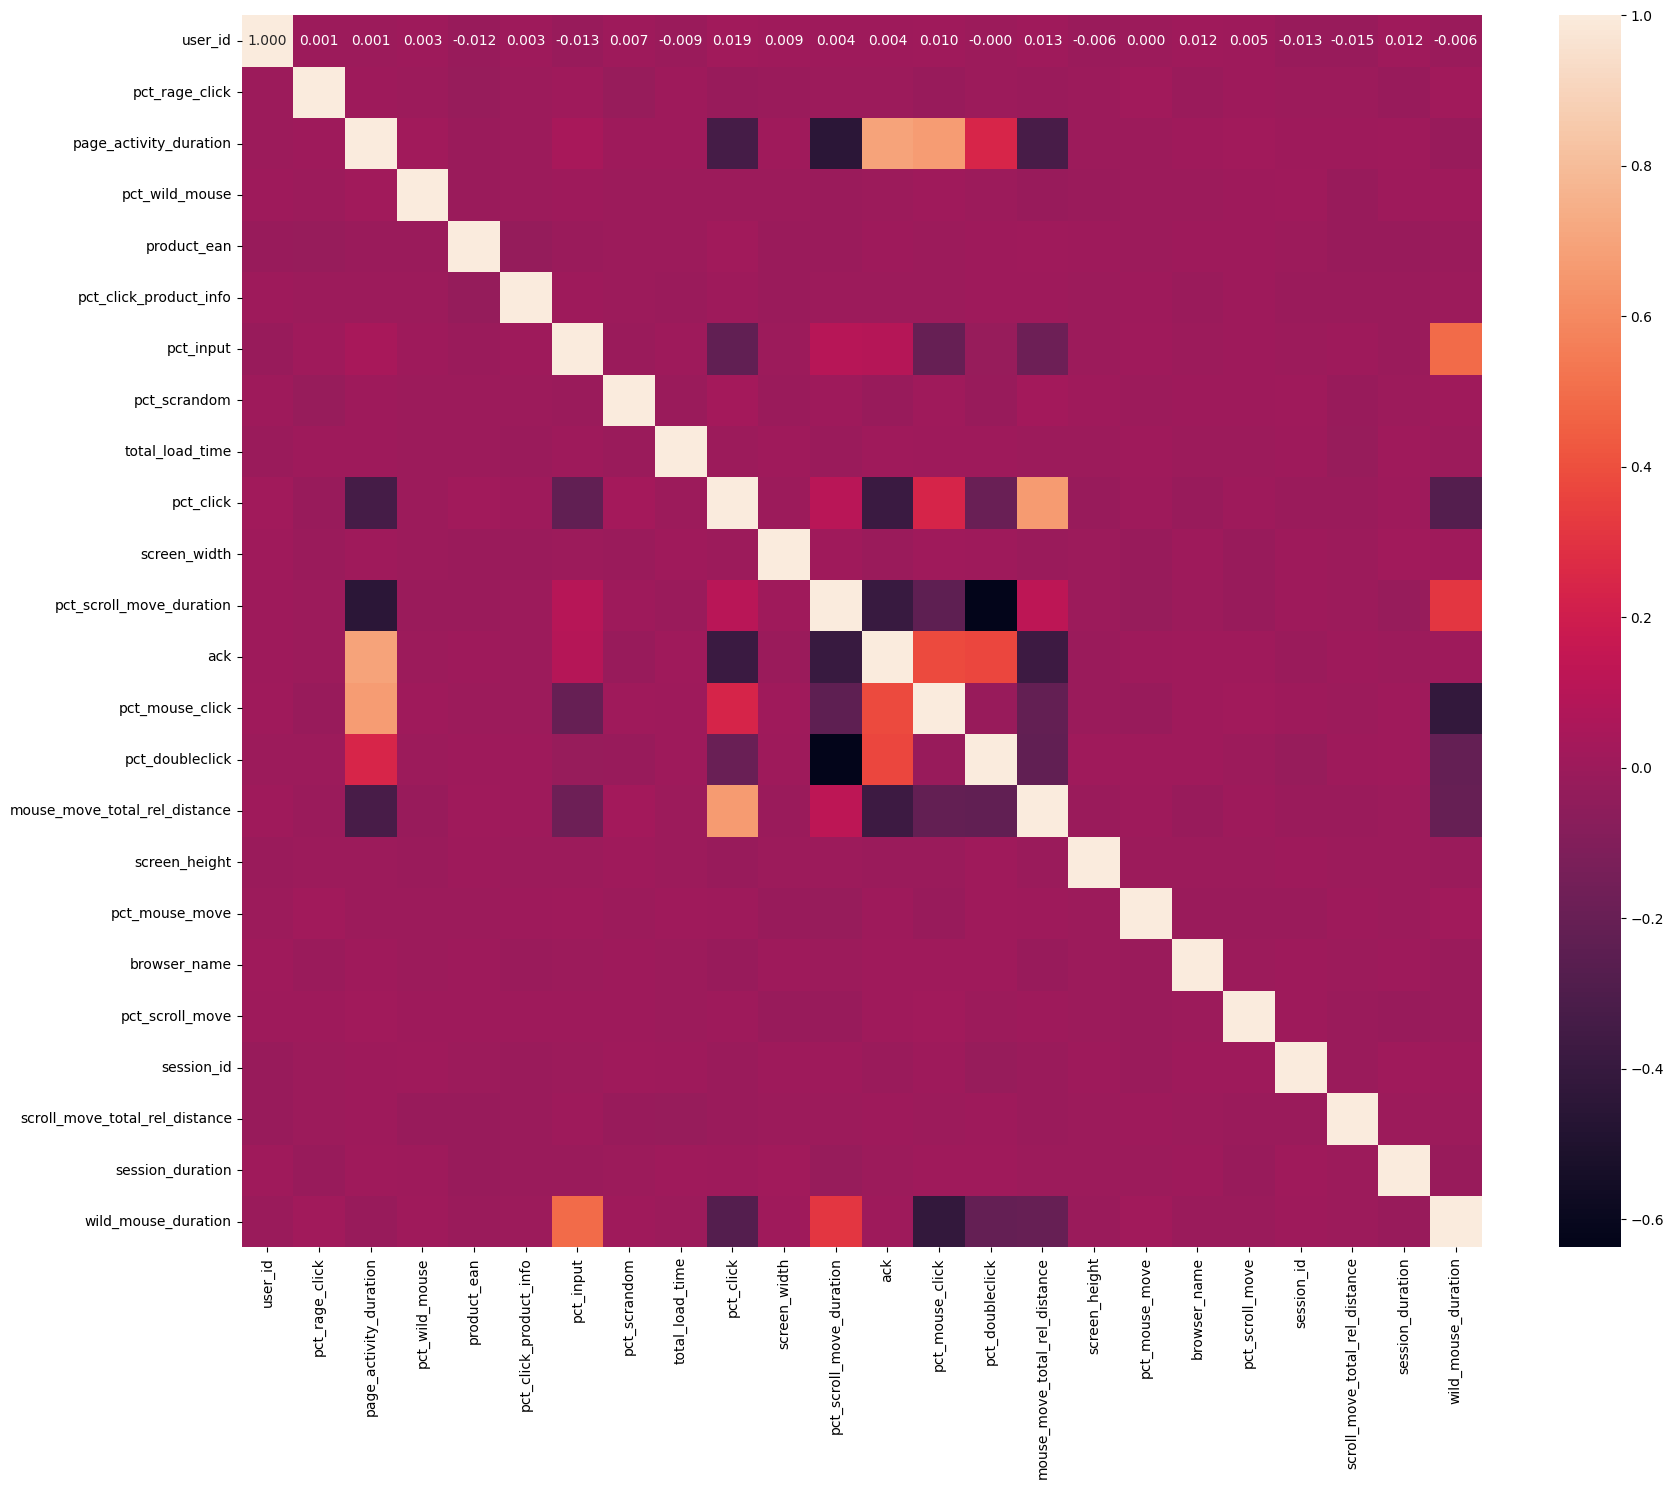

In [1643]:
figure, ax = plt.subplots(figsize=(20,16))
session_sub = session.copy()
session_sub.drop('session_start',axis = 1,inplace=True)
sns.heatmap(session_sub.corr(),ax=ax, annot =True, fmt = ".3f")


Z tejto heatmapy môžeme vyčítať viacero informácii. Ako máme možnosť vidieť atribúty:

    pct_rage_click
    pct_wild_mouse
    product-ean
    pct_click_product_info
    total_load_time
    screen_width
    screen_height
    pct_mouse_move
    pct_scroll_move
    session_id
    scroll_move-total_rel_distance
    session_duration

Majú takmer nulovú koreláciu s ostatnými atribútmi. To znamená, že tieto atribúty nám vo vzájomných
závislostiach neposkytujú takmer žiadnu informáciu.

 Naopak si môžeme všimnúť atribúty:

    page_activity_duration
    pct_click
    pct_scroll_move_duration
    ack
    pct_mouse_click
    pct_doubleclick
    mouse_move_total_rel_distance
    wild_mouse_duration

  Medzi sebou v určitej miere korelujú a preto budeme skúmať ich závislosti neskôr.

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1

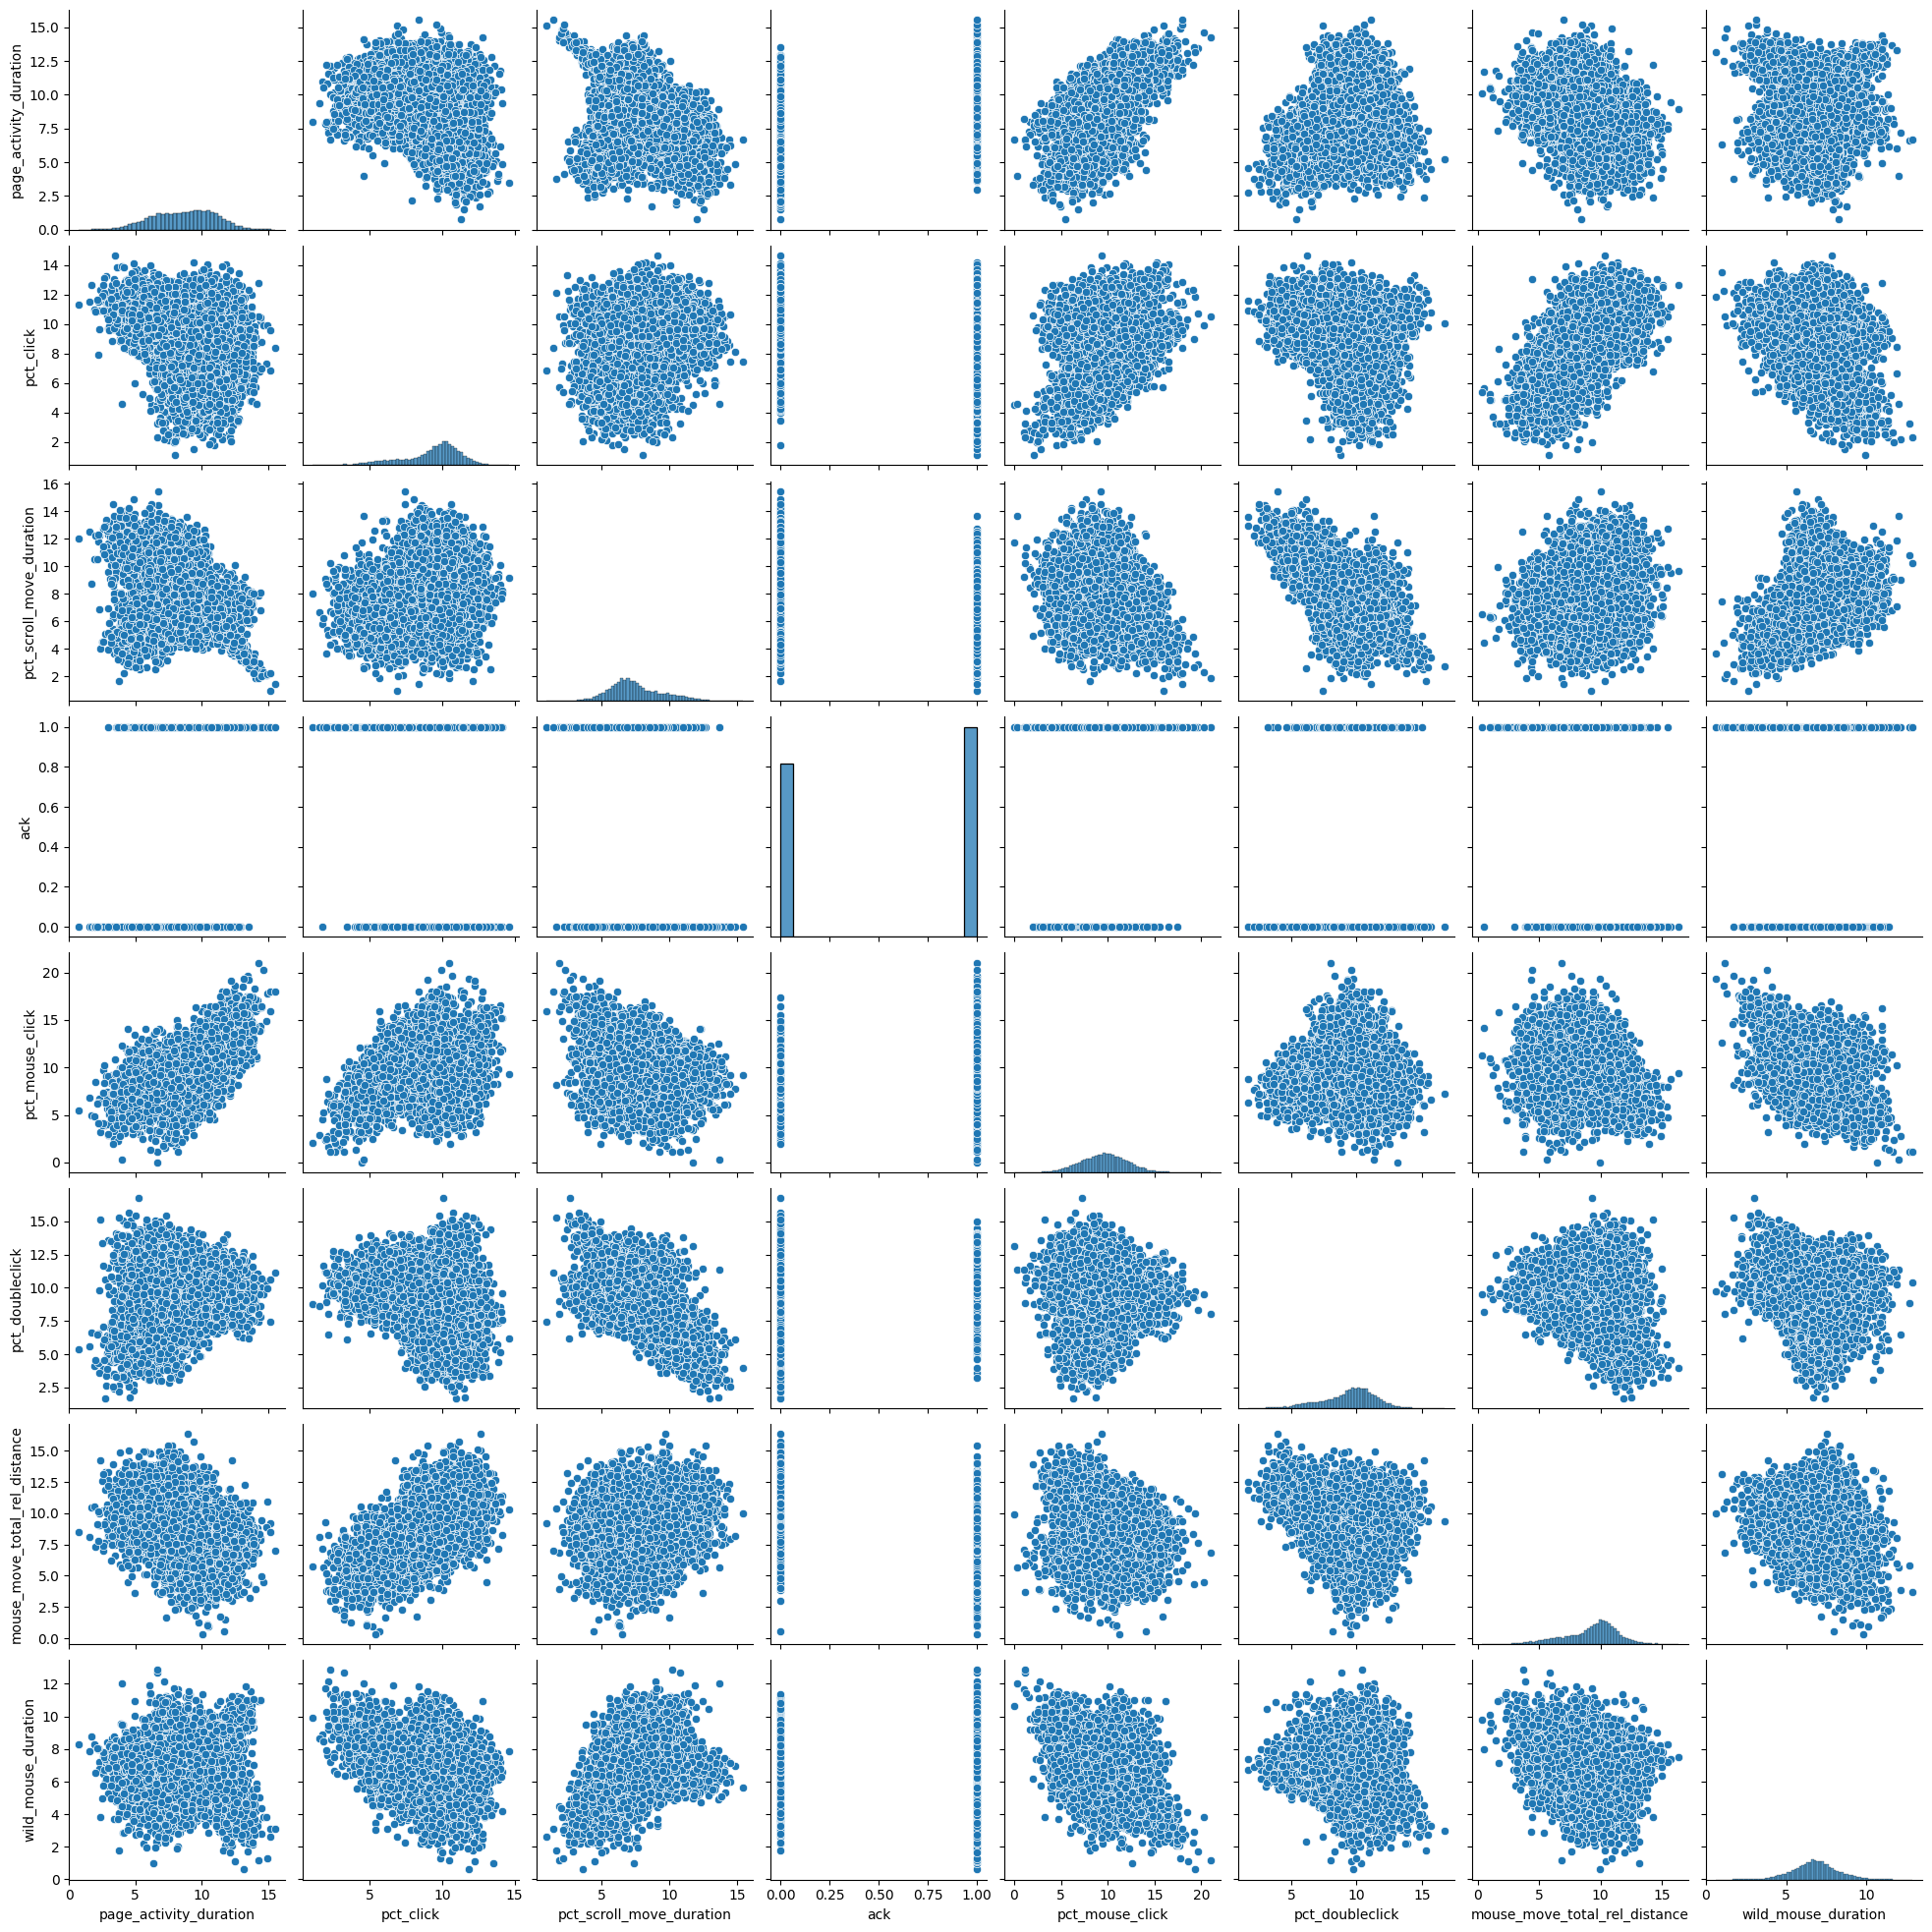

In [1644]:
sns.pairplot(session, vars=['page_activity_duration','pct_click', 
                            'pct_scroll_move_duration','ack',
    'pct_mouse_click', 'pct_doubleclick', 'mouse_move_total_rel_distance',
    'wild_mouse_duration'])

Postupne sme si vygenerovali všetky závislé grafy vzhľadom na atribút ack

C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_5072\2222207023.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  session.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'screen_width'}>,
        <Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'screen_height'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
   

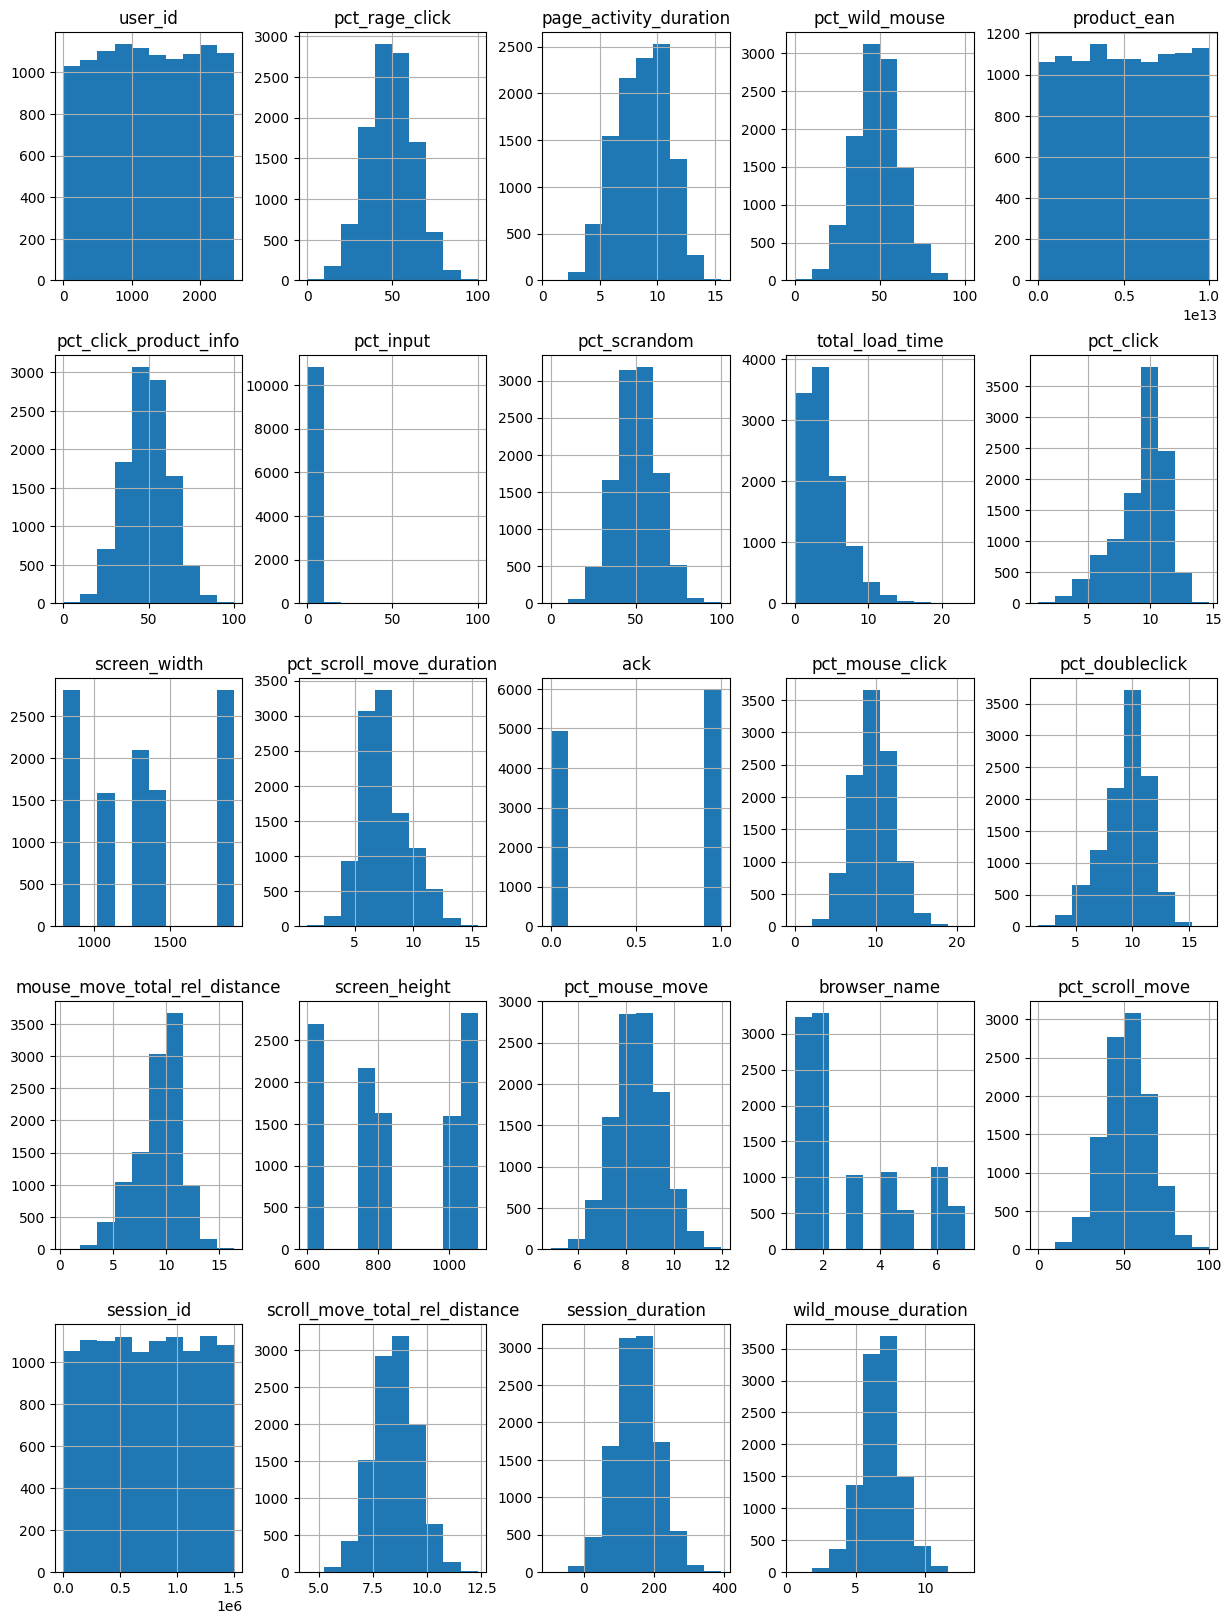

In [1645]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
session.hist(ax = ax)

Z heatmapy vieme pozorovať pri vybranných premenných veľa vzájomných korelácii, v nasledujúcich riadkoch máme pár príkladov. 

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

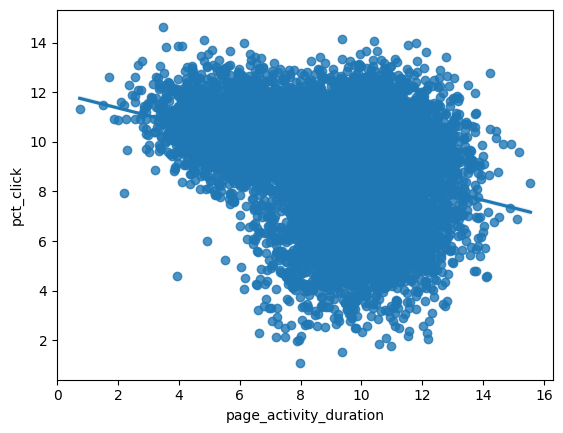

In [1646]:
sns.regplot(x="page_activity_duration",y="pct_click",data=session)



<Axes: xlabel='page_activity_duration', ylabel='pct_scroll_move_duration'>

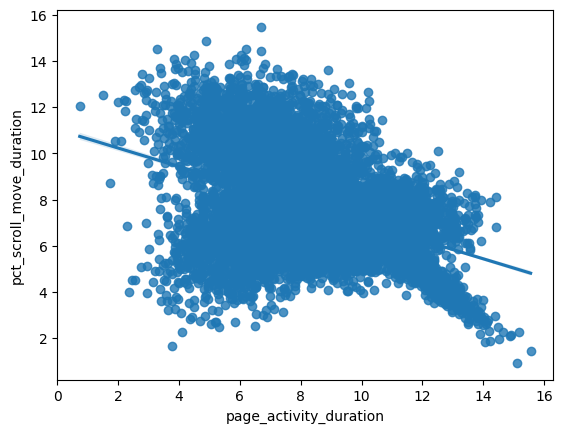

In [1647]:
sns.regplot(x="page_activity_duration",y="pct_scroll_move_duration",data=session)


<Axes: xlabel='page_activity_duration', ylabel='pct_mouse_click'>

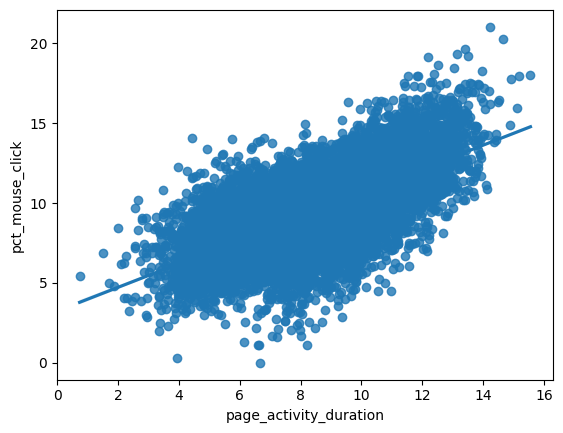

In [1648]:
sns.regplot(x="page_activity_duration",y="pct_mouse_click",data=session)


<Axes: xlabel='page_activity_duration', ylabel='mouse_move_total_rel_distance'>

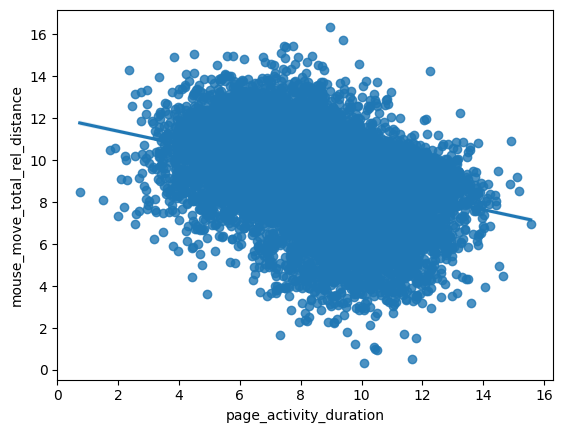

In [1649]:
sns.regplot(x="page_activity_duration",y="mouse_move_total_rel_distance",data=session)


Dané grafy vyjadrovali negatívne a pozitívne korelácie medzi atribútom page_activity_duration a pct_click, pct_mouse_click, mouse_move_total_rel_distance..
Čo sme vyčítali aj z heatmapy.


     Párová analýza dát medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).


V nasledujúcich grafoch môžeme vidieť negatívne korelácie predikovanej premmenej ack s ostatnými premenými, čo vieme vyčítať aj z heatmapy.

<Axes: xlabel='ack', ylabel='pct_scroll_move_duration'>

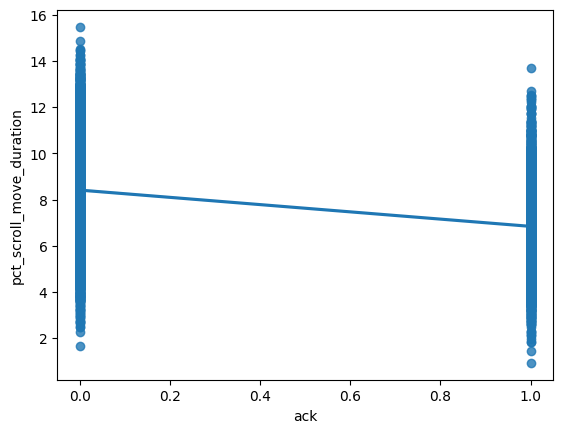

In [1650]:
sns.regplot(x="ack",y="pct_scroll_move_duration",data=session)

<Axes: xlabel='ack', ylabel='pct_click'>

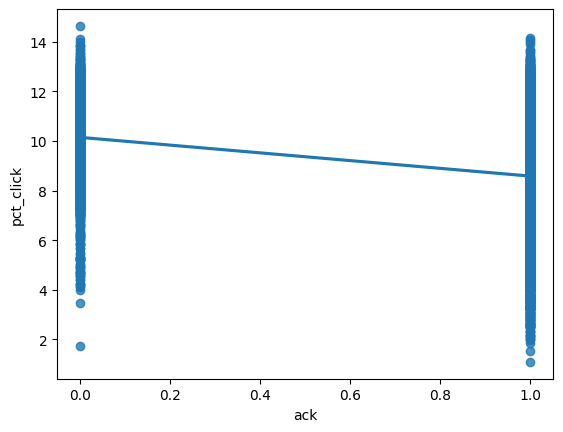

In [1651]:
sns.regplot(x="ack",y="pct_click",data=session)

<Axes: xlabel='ack', ylabel='mouse_move_total_rel_distance'>

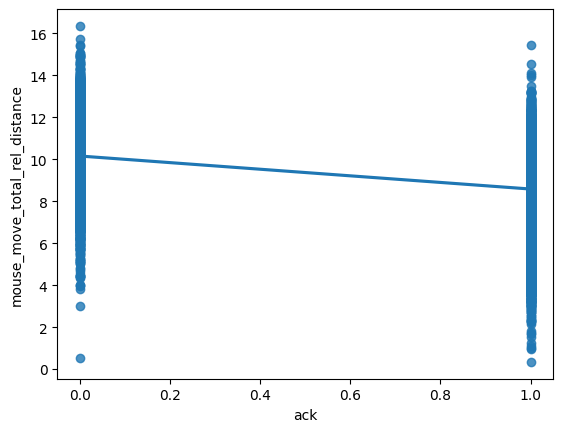

In [1652]:
sns.regplot(x="ack",y="mouse_move_total_rel_distance",data=session)


V nasledujúcich grafoch môžeme vidieť pozitívne korelácie predikovanej premmenej ack s ostatnými premenými, čo vieme vyčítaať aj z heatmapy.

<Axes: xlabel='ack', ylabel='pct_doubleclick'>

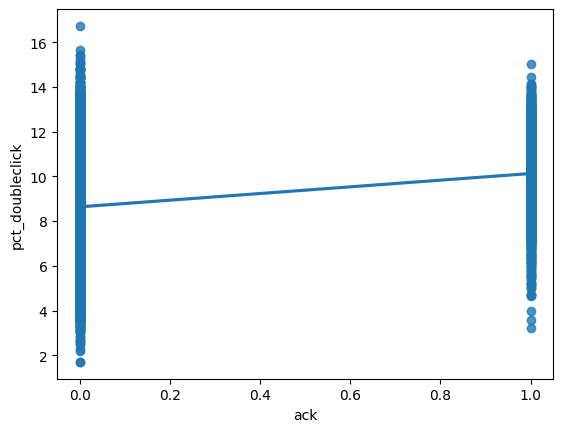

In [1653]:
sns.regplot(x="ack",y="pct_doubleclick",data=session)

<Axes: xlabel='ack', ylabel='pct_mouse_click'>

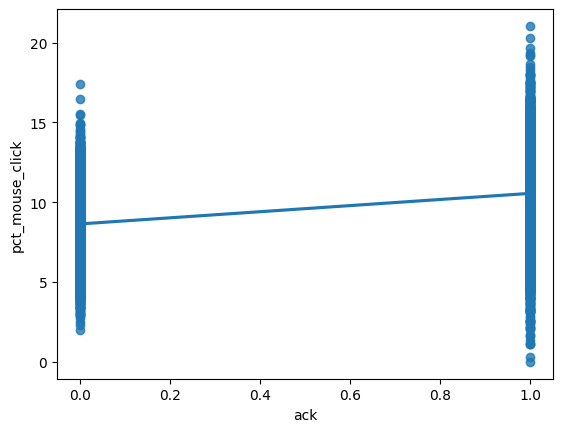

In [1654]:
sns.regplot(x="ack",y="pct_mouse_click",data=session)

<Axes: xlabel='ack', ylabel='page_activity_duration'>

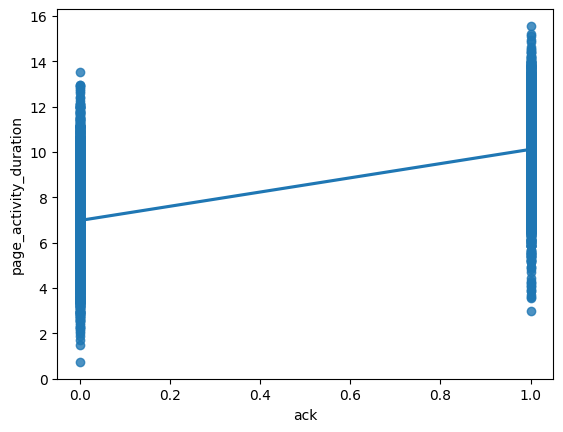

In [1655]:
sns.regplot(x="ack",y="page_activity_duration",data=session)

    Formulácia a štatistické overenie hypotéz o dátach

Hypotéza č.1: čas strávený na stránke (page_activity_duration) má priemerne väčšiu hodnotu pokiaľ používateľ uskutočnil nákup (ack=1)

In [1656]:
purchased = session[session["ack"] == 1].page_activity_duration
not_purchased = session[session["ack"] == 0].page_activity_duration
session["ack"].value_counts()

ack
1.0    5979
0.0    4936
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

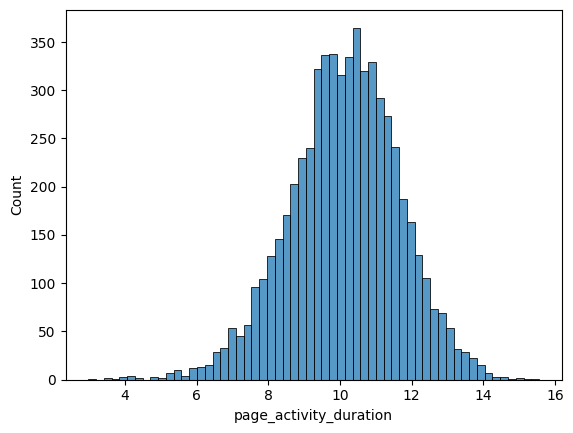

In [1657]:
sns.histplot(purchased)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

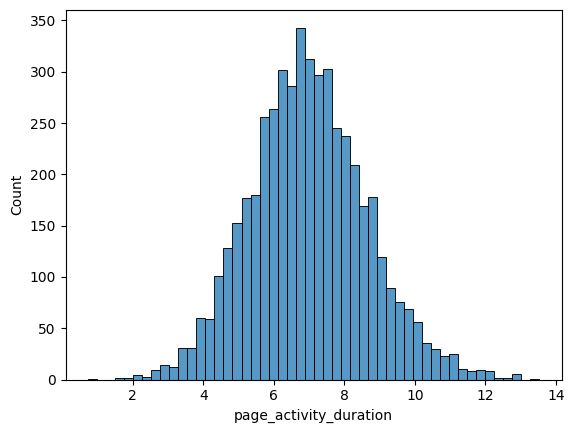

In [1658]:
sns.histplot(not_purchased)

Po analyzovaní grafov vidíme, že oba majú veľký počet outlierov (dáta, ktoré sú zjavne rozdielne, a tým vedia rozrušiť následovné správne použitie). Preto ich odstránime

In [1659]:
purchased = purchased[purchased.between(purchased.quantile(0.20),purchased.quantile(0.80))]
not_purchased = not_purchased[not_purchased.between(not_purchased.quantile(0.20),not_purchased.quantile(0.80))]

In [1660]:
purchased.describe()

count    3587.000000
mean       10.160831
std         0.687893
min         8.869560
25%         9.589915
50%        10.169330
75%        10.741180
max        11.379880
Name: page_activity_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

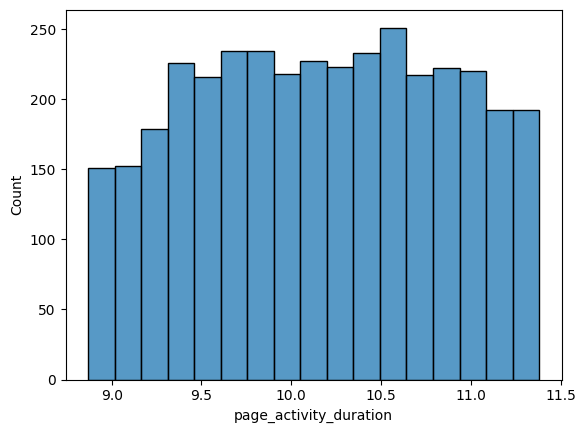

In [1661]:
sns.histplot(purchased)

In [1662]:
not_purchased.describe()

count    2962.000000
mean        6.933114
std         0.738884
min         5.634400
25%         6.312663
50%         6.919145
75%         7.524632
max         8.316220
Name: page_activity_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

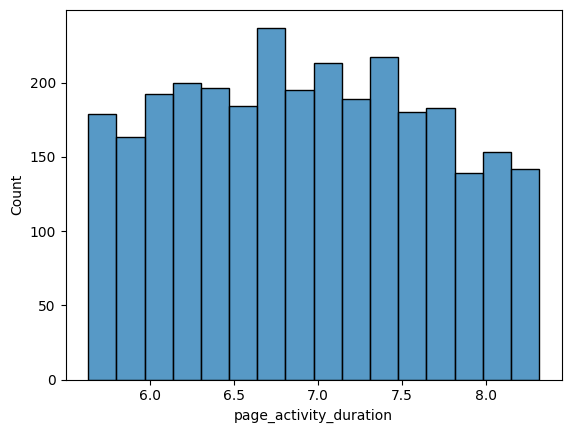

In [1663]:
sns.histplot(not_purchased)

Po odstránení outlierov už dostávame zmenené, oveľa presnejšie dáta

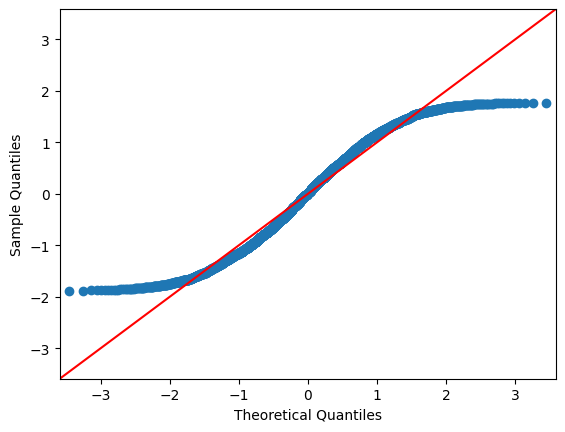

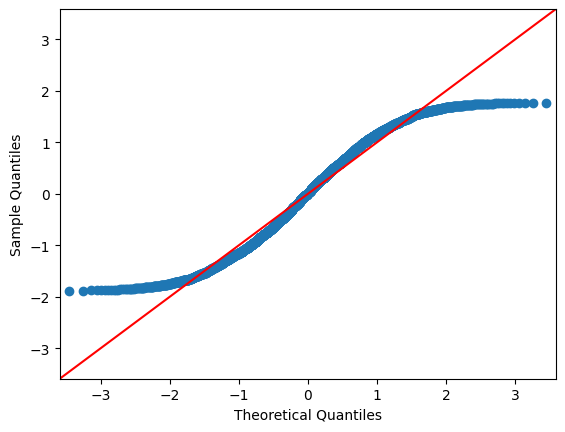

In [1664]:
sm.ProbPlot(purchased,fit=True).qqplot(line="45")

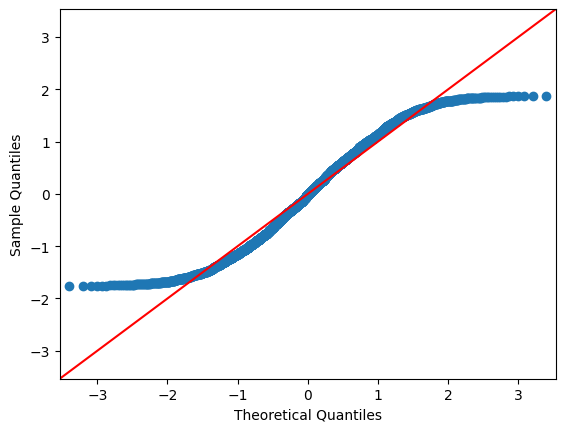

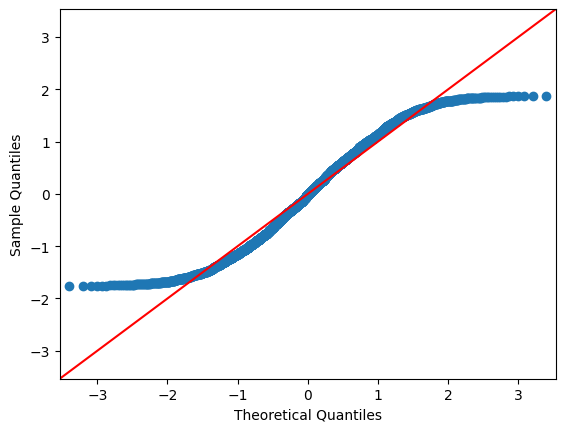

In [1665]:
sm.ProbPlot(not_purchased,fit=True).qqplot(line="45")

QQ plot znázorňuje, že sú oba datasety z rovnakého rozdelenia. Na overenie tohoto faktu môžeme použiť Shapiro-Wilk test.

In [1666]:
stats.shapiro(purchased)

ShapiroResult(statistic=0.9640382528305054, pvalue=5.241538714271387e-29)

In [1667]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9658991098403931, pvalue=6.438138517648812e-26)

In [1668]:
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=10624694.0, pvalue=0.0)

Mannwhitneyov test vyšiel 0, a tým pádom vieme povedať, že nulová hypotéza je zamietnutá.

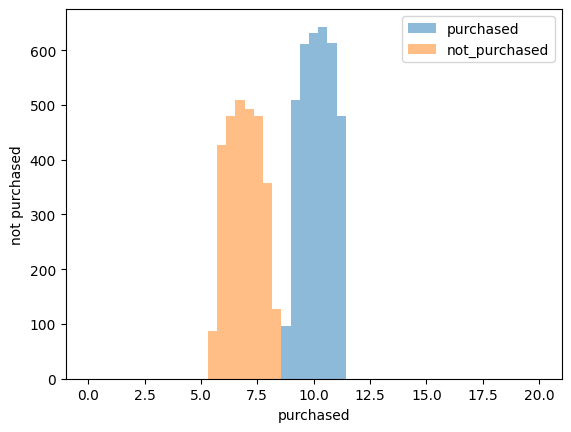

In [1669]:
bins = np.linspace(0, 20, 50)
plt.hist(purchased, bins, alpha=0.5, label='purchased')
plt.hist(not_purchased, bins, alpha=0.5, label='not_purchased')
plt.legend(loc='upper right')
plt.xlabel('purchased')
plt.ylabel('not purchased')
plt.show()

Hypotéza č.2: na základe analýzy atribútu(pct_click) vieme povedať, že tento atribút má menšiu hodnotu pokiaľ užívateľ neuskutočnil nákup (ack=0) (používateľ veľa klikal)

In [1670]:
purchased = session[session["ack"] == 1].pct_click
not_purchased = session[session["ack"] == 0].pct_click
session["ack"].value_counts()

ack
1.0    5979
0.0    4936
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_click', ylabel='Count'>

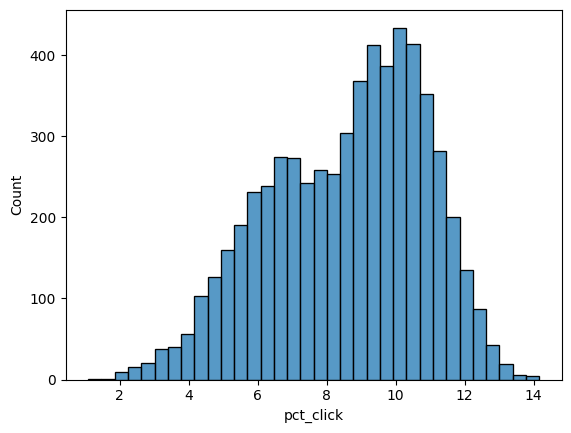

In [1671]:
sns.histplot(purchased)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_click', ylabel='Count'>

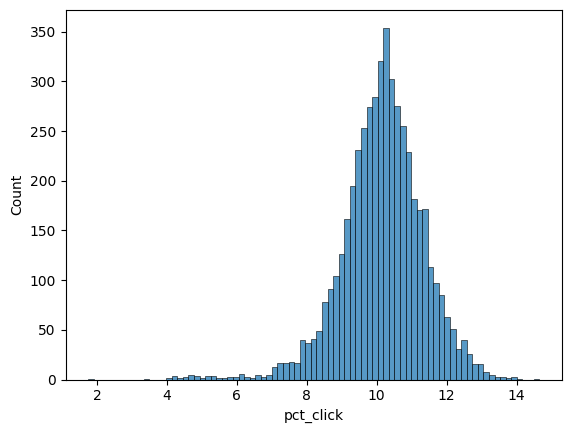

In [1672]:
sns.histplot(not_purchased)

Znova si odstránime outliery pre účel presnejších dát

In [1673]:
purchased = purchased[purchased.between(purchased.quantile(0.30),purchased.quantile(0.70))]
not_purchased = not_purchased[not_purchased.between(not_purchased.quantile(0.30),not_purchased.quantile(0.70))]

In [1674]:
purchased.describe()

count    2391.000000
mean        8.848833
std         0.803930
min         7.267480
25%         8.195820
50%         8.949560
75%         9.533070
max        10.092800
Name: pct_click, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_click', ylabel='Count'>

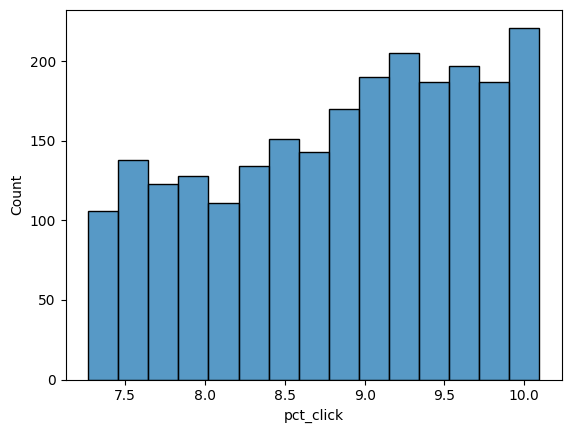

In [1675]:
sns.histplot(purchased)

In [1676]:
not_purchased.describe()

count    1974.000000
mean       10.193599
std         0.293280
min         9.658320
25%         9.947650
50%        10.204215
75%        10.438012
max        10.720880
Name: pct_click, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pct_click', ylabel='Count'>

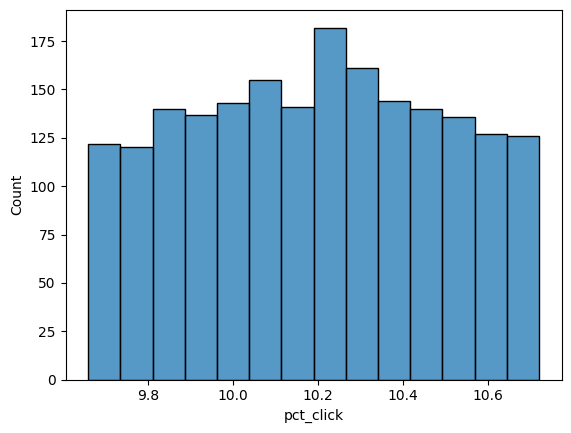

In [1677]:
sns.histplot(not_purchased)

znova vytvoríme QQploty, a spravíme testy pre výsledok hypotézy

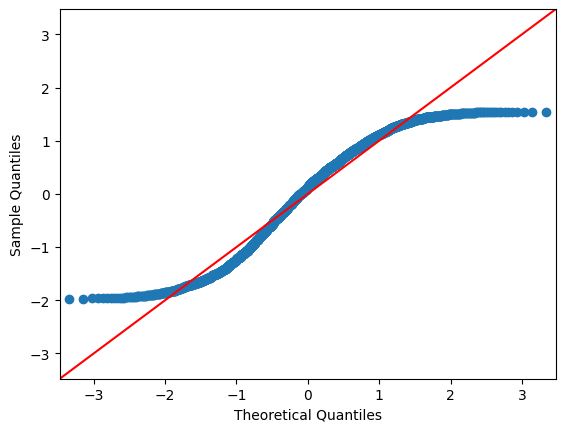

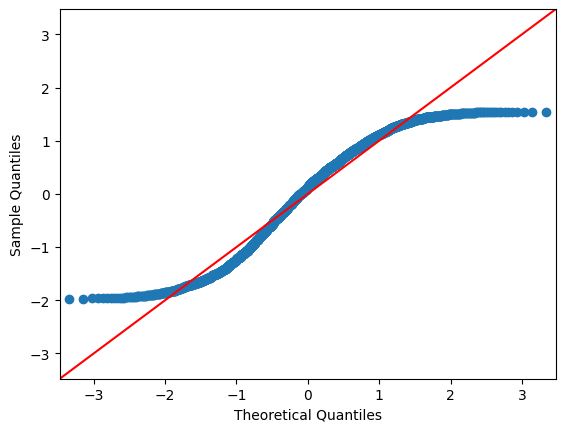

In [1678]:
sm.ProbPlot(purchased,fit=True).qqplot(line="45")

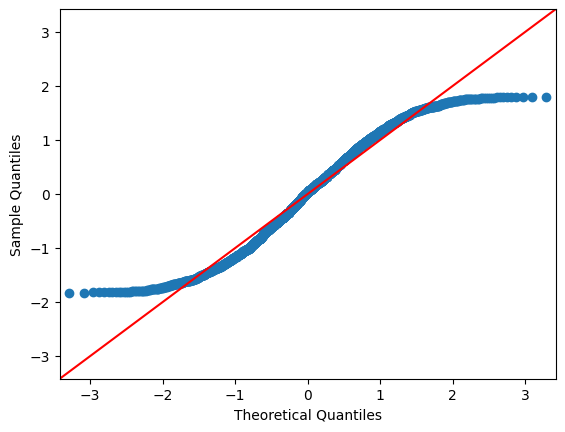

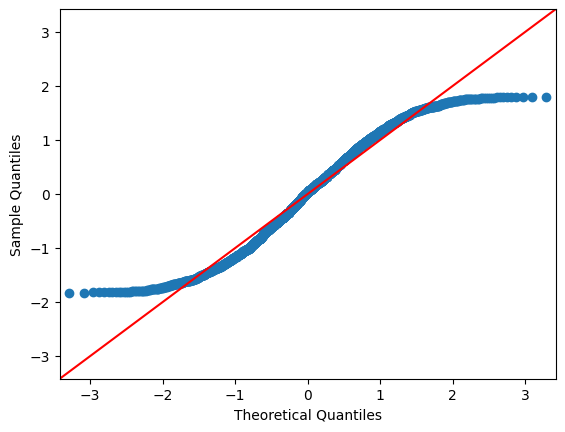

In [1679]:
sm.ProbPlot(not_purchased,fit=True).qqplot(line="45")

In [1680]:
stats.shapiro(purchased)

ShapiroResult(statistic=0.9509487748146057, pvalue=1.4054987029496033e-27)

In [1681]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9654536247253418, pvalue=2.482489379513111e-21)

In [1682]:
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=179579.5, pvalue=0.0)

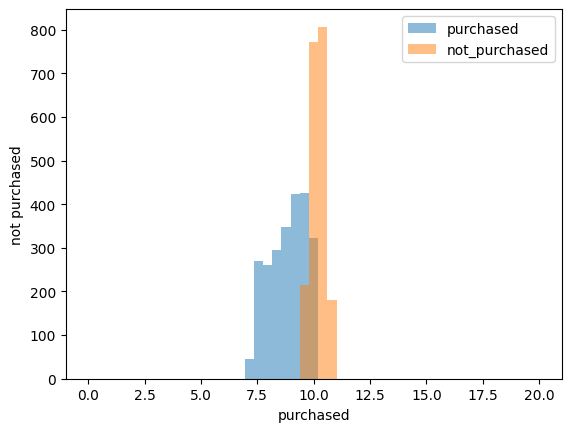

In [1683]:
bins = np.linspace(0, 20, 50)
plt.hist(purchased, bins, alpha=0.5, label='purchased')
plt.hist(not_purchased, bins, alpha=0.5, label='not_purchased')
plt.legend(loc='upper right')
plt.xlabel('purchased')
plt.ylabel('not purchased')
plt.show()

analýza nám tak isto vyšla nula, a teda nulová hypotéza je vyvrátená.

IAU Projekt 2.fáza - Predspracovanie údajov 

Dátum: 19.11.2023

In [1684]:
import pandas as pd
from datetime import date
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split

    Integrácia a čistenie dát

Skontrolovanie, kde v datasetoch sa ešte vyskytujú missing values.

Ako môžemem vidieť v datasete session nám už nechýbajú dáta, lebo sme missing values pre daný dataset v 1. fáze nahrádzali priemerom(mean).

In [1685]:
session.isna().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
session_start                     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

In [1686]:
product.isna().sum()

code           20
store_name      0
product_ean     0
location        0
dtype: int64

Odstránime missing values v datasete product

In [1687]:
product = product.dropna()

In [1688]:
product = product.reset_index().drop("index",axis=1)

In [1689]:
product.isna().sum()

code           0
store_name     0
product_ean    0
location       0
dtype: int64

In [1690]:
user.isna().sum()

address          388
birthdate       1163
sex                0
registration       0
name               0
username           0
mail               0
user_id            0
job             1551
residence       1680
race               0
dtype: int64

Odstránenime nepotrebné atribúty v pokračovaní našej analýze job, residence a address.

In [1691]:
user = user.dropna(subset=['job','address', 'residence'])

Nahrádzanie missing values priemerom v atribúte birthdate.

In [1692]:
user["birthdate"] = pd.to_datetime(user["birthdate"], errors="coerce")

In [1693]:
mean_birthdate = user["birthdate"].mean()
user.fillna(mean_birthdate, inplace=True)

Z datetime odstránime presný čas(hodiny, minúty a sekundy).

In [1694]:
user["birthdate"] = pd.to_datetime(user["birthdate"], errors="coerce").dt.date

Vytvorenie atribútu age podľa atribútu birthdate

In [1695]:
def age(born):
    born = pd.to_datetime(born).date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
user['age'] = user['birthdate'].apply(age)

In [1696]:
user.head()

,address,birthdate,sex,registration,name,username,mail,user_id,job,residence,race,age
6,"Strada Giampiero, 8 Appartamento 29\n38069, Na...",1943-09-12,1,10 Aug 2020,Ermanno Maggioli-Bruno,nicoliniantonietta,daniloroth@outlook.com,1889,Information systems manager,"Viale Erika, 54\n87045, Dipignano (CS)",unspecified,80
8,U Waltrovky 1\n191 67 Rožďalovice,1970-02-10,0,2020-08-04,Dominik Němec,polakmarek,sabinamaresova@volny.cz,1864,Health and safety adviser,Březová 89\n695 44 Lučany nad Nisou,unspecified,53
14,Rörrichtring 0/7\n10761 Sonneberg,2006-10-10,0,2018-10-16,Hans-Hinrich Stoll,xstriebitz,luise88@web.de,2097,Binnenschiffer,Waltraud-Schleich-Weg 6\n03440 Bad Brückenau,unspecified,17
33,秋田県武蔵村山市竜泉28丁目8番16号 上野桜木パレス594,1970-02-10,1,22 Feb 2014,松本 太郎,tsubasa84,rei42@hotmail.com,675,ウェディングプランナー,愛媛県調布市筑土八幡町3丁目16番1号 丸の内アーバン898,unspecified,53
45,Oswald-Jacobi Jäckel-Straße 4/8\n02956 Ebern,1910-10-24,2,"04/27/2019, 00:00:00",Claire Ehlert B.A.,wendepaulina,waldtraut57@web.de,1170,Schornsteinfeger,Bärerweg 729\n57062 Mettmann,unspecified,113


Ako môžeme vidiiť v datasete user sa už nenachádzajú žiadne missing values.

In [1697]:
user.isna().sum()

address         0
birthdate       0
sex             0
registration    0
name            0
username        0
mail            0
user_id         0
job             0
residence       0
race            0
age             0
dtype: int64

Kompletný merge datasetov na ďaľšie narábanie v našej analýze.


In [1698]:
full_merge = session.merge(user, on= "user_id")
full_merge.merge(product, on = "product_ean")
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         1315 non-null   int64  
 1   pct_rage_click                  1315 non-null   float64
 2   page_activity_duration          1315 non-null   float64
 3   pct_wild_mouse                  1315 non-null   float64
 4   product_ean                     1315 non-null   int64  
 5   pct_click_product_info          1315 non-null   float64
 6   pct_input                       1315 non-null   float64
 7   pct_scrandom                    1315 non-null   float64
 8   total_load_time                 1315 non-null   float64
 9   pct_click                       1315 non-null   float64
 10  screen_width                    1315 non-null   int32  
 11  pct_scroll_move_duration        1315 non-null   float64
 12  ack                             13

- dataset merge je tiež bez missing values

In [1699]:
full_merge.isna().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
session_start                     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
address                           0
birthdate                         0
sex                         

    Odstránenie nepotrebných stĺpcov a záznamov


Po spojení datasetov sme zistili, že niektoré stĺpce nemajú pre nás žiadnu výpovedvnú hodnotu, vzhľadom na koreláciu voči ostatným atribútom preto sme sa ich rozhodli odstrániť.

In [1700]:
full_merge.drop(['residence', 'address','birthdate','job','name','username','mail','registration','session_start'], axis=1, errors='ignore', inplace=True)

In [1701]:
full_merge.head()

,user_id,pct_rage_click,page_activity_duration,pct_wild_mouse,product_ean,pct_click_product_info,pct_input,pct_scrandom,total_load_time,pct_click,...,pct_mouse_move,browser_name,pct_scroll_move,session_id,scroll_move_total_rel_distance,session_duration,wild_mouse_duration,sex,race,age
0,374,62.84361,11.17206,53.92373,7388729766852,57.18573,1.59960,47.47953,3.28962,5.02218,...,6.88911,2,48.98359,394667,8.17021,204.12507,8.36077,1,unspecified,53
1,374,62.29686,6.76238,35.95910,1133494067378,51.45067,0.67520,62.19651,3.86284,9.36471,...,9.17228,1,54.62135,438653,8.61640,111.01733,6.36508,1,unspecified,53
2,374,28.49775,5.08288,35.21407,9691571387563,47.04948,0.55607,55.52427,2.46622,11.61429,...,7.46693,2,20.91492,524451,9.58575,319.63291,6.74584,1,unspecified,53
3,374,72.00748,9.31015,41.05256,6915605152419,66.78480,1.41616,38.82935,3.82326,5.30744,...,9.35787,2,46.91141,619666,7.83603,231.27640,8.39993,1,unspecified,53
4,374,19.83088,7.09126,56.54891,5281182318564,51.45736,0.68475,50.77388,6.46337,10.31187,...,8.10860,4,43.39193,232524,8.44412,230.84322,5.97881,1,unspecified,53


In [1702]:
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         1315 non-null   int64  
 1   pct_rage_click                  1315 non-null   float64
 2   page_activity_duration          1315 non-null   float64
 3   pct_wild_mouse                  1315 non-null   float64
 4   product_ean                     1315 non-null   int64  
 5   pct_click_product_info          1315 non-null   float64
 6   pct_input                       1315 non-null   float64
 7   pct_scrandom                    1315 non-null   float64
 8   total_load_time                 1315 non-null   float64
 9   pct_click                       1315 non-null   float64
 10  screen_width                    1315 non-null   int32  
 11  pct_scroll_move_duration        1315 non-null   float64
 12  ack                             13

Atribút race

Keďže strojové učenie nevie pracovať s nenumerickými hodnotami rozhodli sme sa nahradiť jednotlivé typy rás za čísla.

In [1703]:
full_merge.race.value_counts()

race
unspecified    1088
black            90
asian            58
white            57
indian           22
Name: count, dtype: int64

In [1704]:
race_mapping = {
    'unspecified': 0,
    'white': 1,
    'black': 2,
    'indian': 3,
    'asian': 4 
}
print("Pred zmenou: " + str(full_merge['race'].unique()))
full_merge['race'] = full_merge['race'].map(race_mapping)

print("Po zmene: " + str(full_merge['race'].unique()))

Pred zmenou: ['unspecified' 'white' 'black' 'indian' 'asian']
Po zmene: [0 1 2 3 4]


### Riešenie vychýlených hodnôt

Prejdeme si všetky stĺpce ako sú na tom vychýlené hodnoty a potom využijeme funckiu, ktorou vychýlení hodnoty priradíme do kvantilov. Vo funkcii sa využíva transformácia pomocou logaritmu a zároveň 5 a 95 percentil.

-funkcia na zistenie vychýlených hodnôt

In [1705]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    return a[(a > upper) | (a < lower)]

-funkcie na odstránenie a nahradenie vychýlených hodnôt

In [1706]:
def remove_outliers(a):
    outliers = identify_outliers(a)
    a = a.drop(outliers.index)
    return a

def replace_outliers(a):
    a = a.clip(lower=a.quantile(0.05), upper=a.quantile(0.95))
    return a

Kontrola vychýlených hodnôt pred úpravami

In [1707]:
for column in full_merge.columns:
    if column != "ack":
        series = identify_outliers(full_merge[column])
        print(f"{column}: {len(series)}")

user_id: 0
pct_rage_click: 6
page_activity_duration: 1
pct_wild_mouse: 5
product_ean: 0
pct_click_product_info: 10
pct_input: 149
pct_scrandom: 7
total_load_time: 32
pct_click: 44
screen_width: 0
pct_scroll_move_duration: 30
pct_mouse_click: 12
pct_doubleclick: 13
mouse_move_total_rel_distance: 21
screen_height: 0
pct_mouse_move: 3
browser_name: 0
pct_scroll_move: 9
session_id: 0
scroll_move_total_rel_distance: 17
session_duration: 14
wild_mouse_duration: 28
sex: 0
race: 227
age: 571


C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_5072\4001161483.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  full_merge.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'screen_width'}>,
        <Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'screen_height'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
   

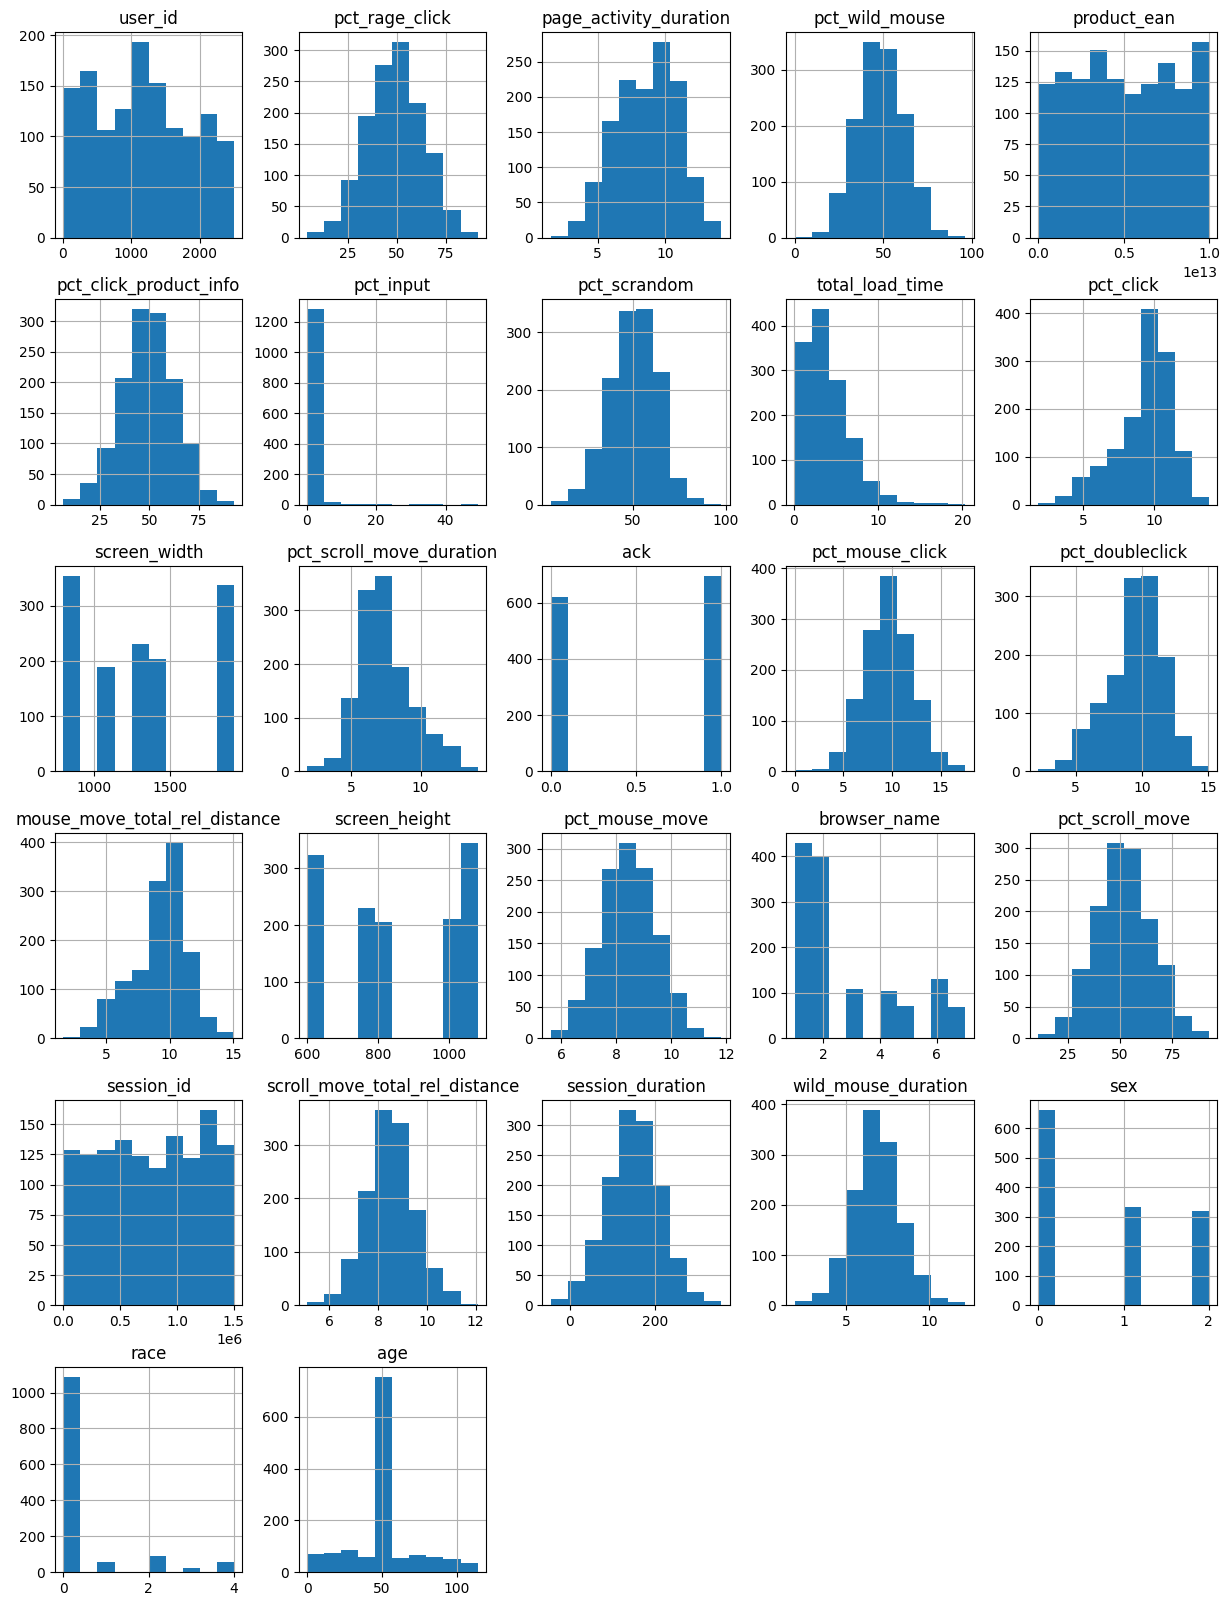

In [1708]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
full_merge.hist(ax = ax)

-úpravy vychýlených hodnôt

In [1709]:
to_remove = []
to_replace = []
for column in full_merge.columns:
    if column != "ack":
        series = identify_outliers(full_merge[column])
        if len(series) < 100 and len(series) > 0:
            to_remove.append(column)
        else:
            to_replace.append(column)

In [1710]:
for column in to_remove:
    full_merge[column] = full_merge[column].drop_duplicates()
    full_merge[column] = remove_outliers(full_merge[column])

In [1711]:
for column in to_replace:
    full_merge[column] = replace_outliers(full_merge[column])

Kontrola vychýlených hodnôt po úpravách

In [1712]:
for column in full_merge.columns:
    if column != "ack":
        series = identify_outliers(full_merge[column])
        print(f"{column}: {len(series)}")

user_id: 0
pct_rage_click: 0
page_activity_duration: 0
pct_wild_mouse: 0
product_ean: 0
pct_click_product_info: 0
pct_input: 149
pct_scrandom: 0
total_load_time: 0
pct_click: 0
screen_width: 0
pct_scroll_move_duration: 0
pct_mouse_click: 0
pct_doubleclick: 0
mouse_move_total_rel_distance: 0
screen_height: 0
pct_mouse_move: 0
browser_name: 0
pct_scroll_move: 0
session_id: 0
scroll_move_total_rel_distance: 0
session_duration: 0
wild_mouse_duration: 0
sex: 0
race: 227
age: 571


Ako môžeme vidieť pri atribútoch: 
        'pct_input', 
        'race',
        'age'
nie je možné riešiť outlier hodnoty, kvôli celkovému rozloženiu dát v atribútoch

C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_5072\4001161483.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  full_merge.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'screen_width'}>,
        <Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'screen_height'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
   

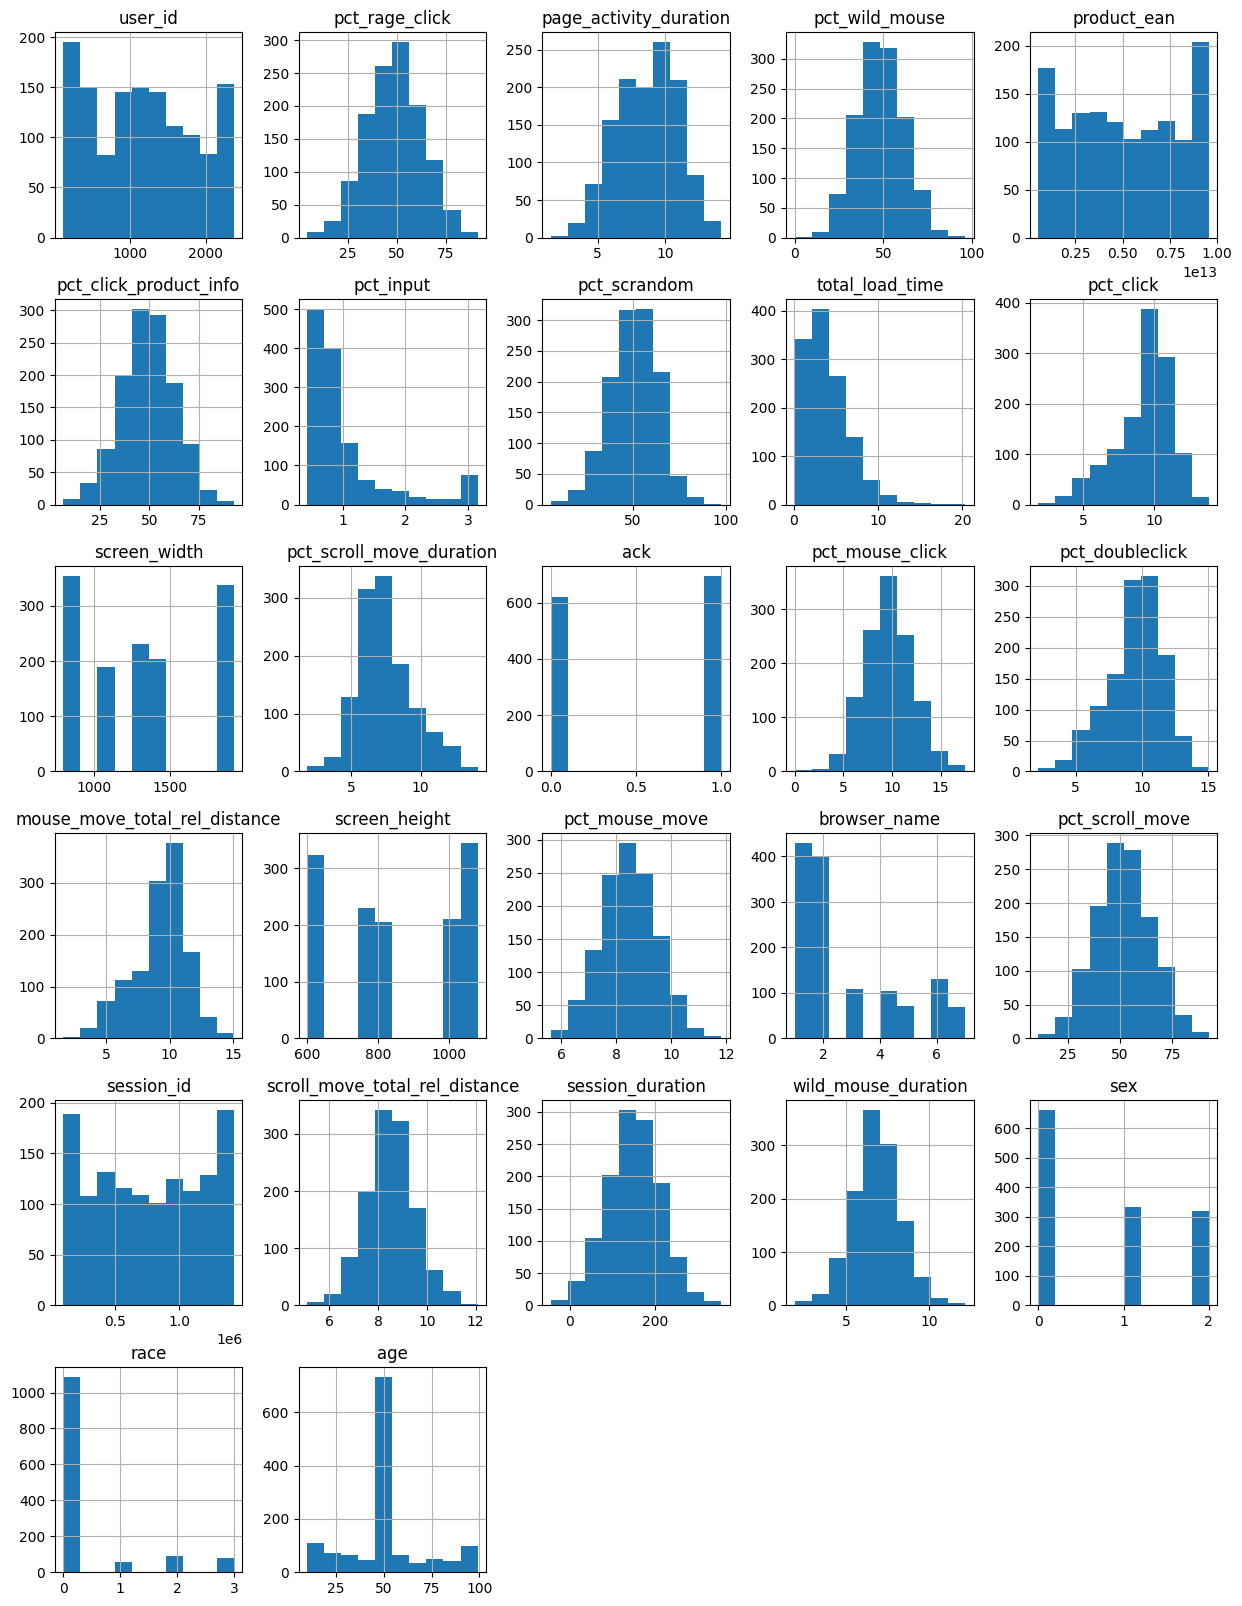

In [1713]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
full_merge.hist(ax = ax)

### Realizácia predspracovania dát